# Introduction to Cosmological Simulations

## What Are Cosmological Simulations?

Cosmological simulations are computational experiments that model the evolution of the universe from the Big Bang to the present day. They help us understand:

- **How galaxies form and evolve** over cosmic time
- **The role of dark matter** in structure formation
- **Gas physics** including cooling, star formation, and feedback from stars and black holes
- **Large-scale structure** of the universe


Why do you think we need "simulations to do this?"

### IllustrisTNG Simulations

The **IllustrisTNG** (The Next Generation) project is a suite of state-of-the-art cosmological hydrodynamical simulations. These simulations include:

1. **Dark Matter**: The invisible scaffolding that holds galaxies together
2. **Gas**: Baryonic matter that forms stars and planets
3. **Stars**: Formed from gas clouds
4. **Black Holes**: Supermassive black holes at galaxy centers

### Types of Particles

| Particle Type | ID | Description |
|---------------|----|--------------|
| Gas | 0 | Hydrodynamic gas cells |
| Dark Matter | 1 | Collisionless dark matter particles |
| Tracers | 3 | Monte Carlo tracer particles |
| Stars | 4 | Star particles |
| Black Holes | 5 | Black hole particles |

### Simulation Data Structure

The data is organized in **HDF5 files** (Hierarchical Data Format), which efficiently store large datasets:

- **Snapshots** (`snapshot_XXX.hdf5`): Contains particle data at a specific time/redshift
- **Group catalogs** (`groups_XXX.hdf5`): Contains information about halos and subhalos

Let's start exploring!

## 📚 Python Skills You'll Practice

This tutorial is designed for **beginners** learning Python! As you work through the notebook, you'll practice:

### Basic Python Concepts
- ✅ **Variables**: Storing numbers, text, and data
- ✅ **Strings and f-strings**: Creating text with variables like `f"Value: {x}"`
- ✅ **Lists**: Organizing multiple items in `[item1, item2, item3]`
- ✅ **Dictionaries**: Storing key-value pairs like `{key: value}`
- ✅ **For loops**: Repeating code for each item in a collection

### Working with Data
- ✅ **NumPy arrays**: Storing large sets of numbers efficiently  
- ✅ **Array indexing**: Accessing specific values with `array[row, column]`
- ✅ **Boolean masks**: Selecting data that meets certain conditions
- ✅ **Functions**: Creating reusable code with `def function_name():`

### File and Data Handling
- ✅ **Opening files**: Using `with` statements to read HDF5 files
- ✅ **File paths**: Using `os.path.join()` to create file paths
- ✅ **Reading HDF5**: Accessing simulation data from specialized files

### Visualization
- ✅ **Matplotlib**: Creating plots and figures
- ✅ **Histograms**: Counting data in bins
- ✅ **Scatter plots**: Plotting individual points
- ✅ **Subplots**: Creating multi-panel figures

**Don't worry if these are new to you!** Each concept is explained when we use it, with plenty of comments in the code.

---


## Setup and Imports

First, let's import the necessary libraries for working with HDF5 files and plotting.

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

# Set up nice plotting defaults
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## Exploring Simulation Data

Let's define the paths to our simulation data and explore what's available.

### Python Concepts You'll Learn

Before we start exploring the data, let's briefly review some Python concepts we'll use:

1. **Strings and f-strings**: We'll use f-strings (formatted strings) to create file paths and display information. They look like `f"text {variable}"` and automatically insert variable values.

2. **os.path.join()**: This function combines folder and file names into a complete path. It's better than manually typing paths because it works on different operating systems.

3. **Dictionaries**: These store data as key-value pairs, like `{key: value}`. We'll use them to organize particle type information.

4. **Lists**: Ordered collections of items in square brackets `[item1, item2, item3]`. We'll use lists to store multiple file paths.

5. **For loops**: These repeat code for each item in a collection. The basic structure is:
   ```python
   for item in collection:
       # do something with item
   ```

Don't worry if these are new - we'll explain each one as we use it!

In [ ]:
# Define base paths
# These are the main folders where our simulation data is stored
LH_base_path = '/mnt/home/mlee1/Sims/IllustrisTNG/LH/'
param_path = '/mnt/home/mlee1/Sims/IllustrisTNG/1P/'

# Choose a simulation to explore
# LH_0 is one of many simulations in the Latin Hypercube suite
sim_name = 'LH_0'

# Use os.path.join to combine the folder path and simulation name
# This creates the full path: /mnt/home/mlee1/Sims/IllustrisTNG/LH/LH_0
sim_path = os.path.join(LH_base_path, sim_name)

# Choose a snapshot number (90 is close to z=0, present day)
snapshot_num = 90

# Construct file paths using f-strings
# The {snapshot_num:03d} means "insert snapshot_num as a 3-digit number with leading zeros"
# So snapshot_num=90 becomes "090"
snapshot_file = os.path.join(sim_path, f'snapshot_{snapshot_num:03d}.hdf5')
groups_file = os.path.join(sim_path, f'groups_{snapshot_num:03d}.hdf5')

# Print the results so we can see what we created
print(f"Simulation: {sim_name}")
print(f"Snapshot file: {snapshot_file}")
print(f"Groups file: {groups_file}")

# Check if the files actually exist on the computer
# os.path.exists() returns True if the file exists, False if it doesn't
print(f"\nSnapshot exists: {os.path.exists(snapshot_file)}")
print(f"Groups exists: {os.path.exists(groups_file)}")

Simulation: LH_0
Snapshot file: /mnt/home/mlee1/Sims/IllustrisTNG/LH/LH_0/snapshot_090.hdf5
Groups file: /mnt/home/mlee1/Sims/IllustrisTNG/LH/LH_0/groups_090.hdf5

Snapshot exists: True
Groups exists: True


## Reading HDF5 Files

HDF5 files have a hierarchical structure similar to a file system. Let's explore the structure of a snapshot file.

### Understanding the Code: Opening Files

In the next cell, we'll see two important Python concepts:

**1. The `with` statement:**
```python
with h5py.File(filename, 'r') as f:
    # work with the file
```
- The `with` statement opens a file and automatically closes it when we're done
- `'r'` means "read-only" - we're just looking at the data, not changing it
- `as f` gives us a nickname (`f`) to refer to the file

**2. The `for` loop with `.keys()`:**
```python
for key in header.attrs.keys():
    print(key)
```
- `.keys()` gets all the names (keys) from a dictionary or HDF5 attributes
- The `for` loop goes through each key one at a time
- We can then print or use each key

Let's see this in action!

In [ ]:
# Note: We're defining a function here, but don't worry if functions are new to you.
# We won't use this function much - just know it helps explore file structure.
def explore_hdf5_structure(filename, max_depth=3):
    """
    Recursively explore and print the structure of an HDF5 file.
    """
    def print_attrs(name, obj, indent=""):
        print(f"{indent}{name}")
        if isinstance(obj, h5py.Dataset):
            print(f"{indent}  Shape: {obj.shape}, Type: {obj.dtype}")
    
    with h5py.File(filename, 'r') as f:
        print(f"\nStructure of {os.path.basename(filename)}:")
        print("=" * 60)
        f.visititems(lambda name, obj: print_attrs(name, obj, "  "))

# Now let's explore the snapshot file step by step
# Open the file in read mode ('r')
with h5py.File(snapshot_file, 'r') as f:
    # First, let's see what's at the top level of the file
    # list(f.keys()) converts the keys to a list we can print
    print("Top-level groups in snapshot file:")
    print(list(f.keys()))
    
    # Now let's look at the Header section
    # The Header contains metadata (information about the simulation)
    print("\nHeader attributes:")
    header = f['Header']  # Get the Header group
    
    # Loop through all the attributes in the Header
    for key in header.attrs.keys():
        # Print each attribute name and its value
        print(f"  {key}: {header.attrs[key]}")

Top-level groups in snapshot file:
['Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5']

Header attributes:
  BoxSize: 25000.0
  Composition_vector_length: 0
  Flag_Cooling: 1
  Flag_DoublePrecision: 0
  Flag_Feedback: 1
  Flag_Metals: 0
  Flag_Sfr: 1
  Flag_StellarAge: 0
  Git_commit: b'4ab97a2c5659df3e83e01c53f8142816fc0db675'
  Git_date: b'Tue May 3 10:27:55 2016 +0200'
  HubbleParam: 0.6711
  MassTable: [0.        0.0067207 0.        0.        0.        0.       ]
  NumFilesPerSnapshot: 1
  NumPart_ThisFile: [15583297 16777216        0        0   736506     1122]
  NumPart_Total: [15583297 16777216        0        0   736506     1122]
  NumPart_Total_HighWord: [0 0 0 0 0 0]
  Omega0: 0.309
  OmegaBaryon: 0.049
  OmegaLambda: 0.691
  Redshift: 2.220446049250313e-16
  Time: 0.9999999999999998
  UnitLength_in_cm: 3.085678e+21
  UnitMass_in_g: 1.989e+43
  UnitVelocity_in_cm_per_s: 100000.0


## Particle Types and Data

Let's look at the different particle types available in the simulation.

### Understanding Dictionaries

In the next cell, we'll create a **dictionary** to organize information about particle types:

```python
particle_types = {
    0: 'Gas',
    1: 'DarkMatter',
    4: 'Stars'
}
```

- Dictionaries use curly braces `{}`
- Each entry has a **key** (like `0`) and a **value** (like `'Gas'`)
- We separate key and value with a colon `:`
- We can look up values using their keys: `particle_types[0]` gives us `'Gas'`

We'll also use `.items()` to loop through dictionaries:
```python
for key, value in particle_types.items():
    print(key, value)
```
This gives us both the key (particle type ID) and value (particle name) in each loop iteration.

In [ ]:
# Create a dictionary mapping particle type IDs (numbers) to names (text)
# Each type of particle has a number ID in the simulation files
particle_types = {
    0: 'Gas',           # PartType0 contains gas particles
    1: 'DarkMatter',    # PartType1 contains dark matter particles
    2: 'DiskStars',     # Not used in TNG
    3: 'BulgeStars',    # Not used in TNG (tracers in some simulations)
    4: 'Stars',         # PartType4 contains star particles
    5: 'BlackHoles'     # PartType5 contains black hole particles
}

# Check which particle types are present in our snapshot file
# We'll open the file and look inside
with h5py.File(snapshot_file, 'r') as f:
    print("Available particle types in this snapshot:\n")
    
    # Loop through each particle type in our dictionary
    # .items() gives us both the ID number and the name
    for ptype_id, ptype_name in particle_types.items():
        # Create the group name, like "PartType0" or "PartType1"
        group_name = f'PartType{ptype_id}'
        
        # Check if this group exists in the file
        if group_name in f:
            # If it exists, get how many particles of this type we have
            # The Header stores this information in an array
            num_particles = f['Header'].attrs['NumPart_ThisFile'][ptype_id]
            
            # Print the particle type and count
            # The :, in the number adds commas (like 1,000,000)
            print(f"PartType{ptype_id} ({ptype_name}): {num_particles:,} particles")
            
            # Show what data fields are available for this particle type
            # list() converts the keys to a list we can see
            print(f"  Fields: {list(f[group_name].keys())}")
            print()  # Empty line for readability

Available particle types in this snapshot:

PartType0 (Gas): 15,583,297 particles
  Fields: ['CenterOfMass', 'Coordinates', 'Density', 'ElectronAbundance', 'EnergyDissipation', 'GFM_AGNRadiation', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_WindDMVelDisp', 'GFM_WindHostHaloMass', 'InternalEnergy', 'Machnumber', 'MagneticField', 'MagneticFieldDivergence', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'StarFormationRate', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']

PartType1 (DarkMatter): 16,777,216 particles
  Fields: ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']

PartType4 (Stars): 736,506 particles
  Fields: ['BirthPos', 'BirthVel', 'Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_StellarFormationTime', 'GFM_StellarPhotometrics', 'Masses', 'ParticleIDs', 'Potential', 

## Loading Particle Data

Now let's create functions to easily load particle data from snapshots.

In [7]:
def load_particle_data(snapshot_path, ptype, field):
    """
    Load a specific field for a particle type from a snapshot.
    
    Parameters:
    -----------
    snapshot_path : str
        Path to the snapshot HDF5 file
    ptype : int
        Particle type (0=Gas, 1=DM, 4=Stars, 5=BH)
    field : str
        Name of the field to load (e.g., 'Coordinates', 'Masses')
    
    Returns:
    --------
    data : numpy array
        The requested particle data
    """
    with h5py.File(snapshot_path, 'r') as f:
        data = f[f'PartType{ptype}/{field}'][:]
    return data

def get_box_size(snapshot_path):
    """
    Get the simulation box size in comoving kpc/h.
    """
    with h5py.File(snapshot_path, 'r') as f:
        box_size = f['Header'].attrs['BoxSize']
    return box_size

def get_redshift(snapshot_path):
    """
    Get the redshift of the snapshot.
    """
    with h5py.File(snapshot_path, 'r') as f:
        redshift = f['Header'].attrs['Redshift']
    return redshift

# Test the functions
box_size = get_box_size(snapshot_file)
redshift = get_redshift(snapshot_file)

print(f"Box size: {box_size:.1f} ckpc/h")
print(f"Redshift: {redshift:.3f}")

Box size: 25000.0 ckpc/h
Redshift: 0.000


## Visualizing Particle Distributions

Let's create 2D projections of different particle types to see their spatial distribution.

### Understanding Arrays and Indexing

Before we visualize the data, let's understand how particle positions are stored:

**NumPy Arrays:**
- NumPy (Numerical Python) is a library for working with large arrays of numbers
- Arrays are like lists, but faster and with more features
- Our particle data is stored in **2D arrays**: rows and columns

**Particle Position Array:**
```python
positions = [[x1, y1, z1],
             [x2, y2, z2],
             [x3, y3, z3],
             ...]
```
Each row is one particle, with its x, y, z coordinates.

**Indexing (getting specific values):**
- `positions[0]` → first particle: `[x1, y1, z1]`
- `positions[:, 0]` → all x-coordinates: `[x1, x2, x3, ...]`
- `positions[:, 1]` → all y-coordinates
- `positions[:, 2]` → all z-coordinates

The `:` means "all rows", and the number after the comma specifies the column.

**Array operations:**
- `.min()` → finds the smallest value
- `.max()` → finds the largest value  
- `len()` → counts how many items

In [ ]:
# Load dark matter positions
# This returns a 2D array where each row is one particle: [x, y, z]
dm_positions = load_particle_data(snapshot_file, 1, 'Coordinates')

# len() tells us how many particles we have (how many rows in the array)
print(f"Loaded {len(dm_positions):,} dark matter particles")

# .shape tells us the dimensions: (number of particles, 3 coordinates)
print(f"Position shape: {dm_positions.shape}")

# Access the x-coordinates of all particles using [:, 0]
# : means "all rows", 0 means "first column" (x coordinate)
x_coordinates = dm_positions[:, 0]

# Find the minimum and maximum x positions
print(f"Position range: x=[{x_coordinates.min():.1f}, {x_coordinates.max():.1f}] ckpc/h")

# Note: We could also write this in one line:
# print(f"Position range: x=[{dm_positions[:,0].min():.1f}, {dm_positions[:,0].max():.1f}] ckpc/h")

Loaded 16,777,216 dark matter particles
Position shape: (16777216, 3)
Position range: x=[0.0, 25000.0] ckpc/h


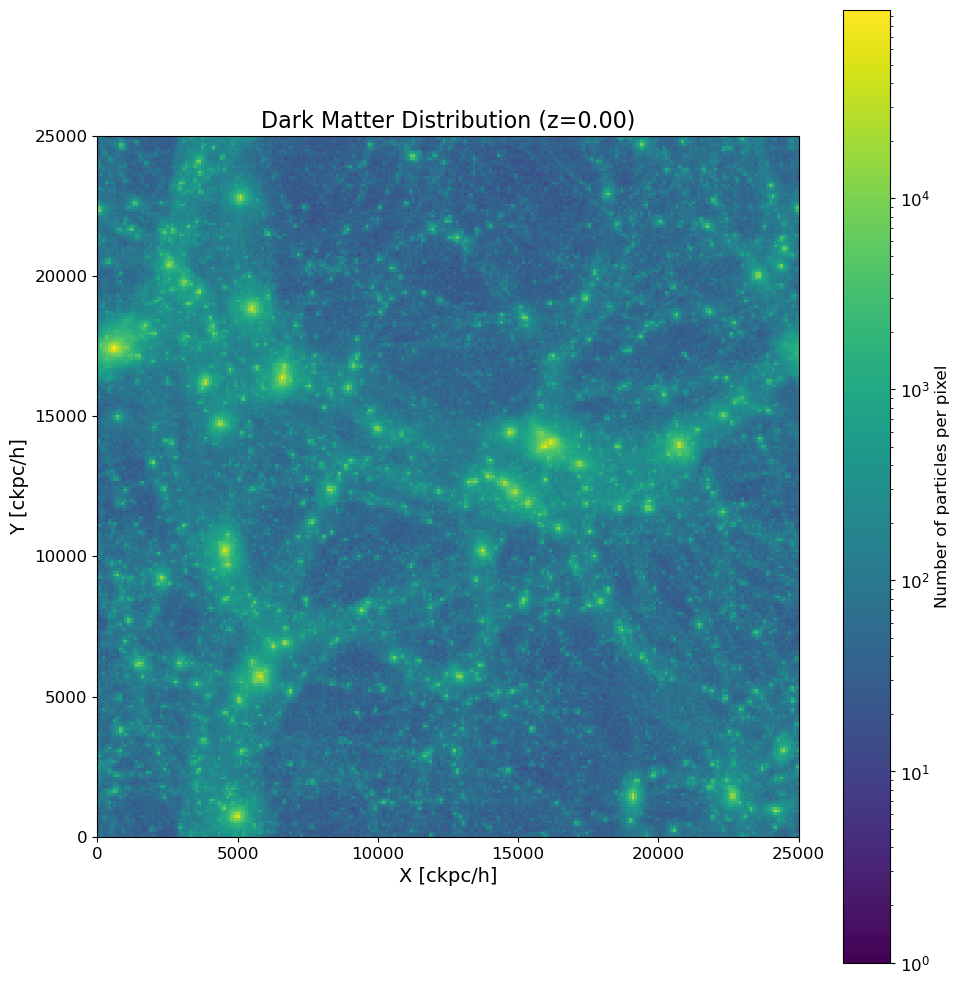

In [10]:
def plot_projection(positions, title, bins=256, slice_thickness=None):
    """
    Create a 2D histogram projection of particle positions.
    
    Parameters:
    -----------
    positions : array
        Particle positions (N, 3)
    title : str
        Plot title
    bins : int
        Number of bins for the histogram
    slice_thickness : float, optional
        If provided, only plot particles within this z-thickness
    """
    # Apply slice if requested
    if slice_thickness is not None:
        box_center = box_size / 2
        mask = np.abs(positions[:, 2] - box_center) < slice_thickness / 2
        positions = positions[mask]
    
    # Create 2D histogram
    H, xedges, yedges = np.histogram2d(
        positions[:, 0], 
        positions[:, 1], 
        bins=bins,
        range=[[0, box_size], [0, box_size]]
    )
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(
        H.T, 
        origin='lower',
        extent=[0, box_size, 0, box_size],
        cmap='viridis',
        norm=LogNorm(vmin=1, vmax=H.max()),
        interpolation='nearest'
    )
    
    ax.set_xlabel('X [ckpc/h]', fontsize=14)
    ax.set_ylabel('Y [ckpc/h]', fontsize=14)
    ax.set_title(title, fontsize=16)
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Number of particles per pixel', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Plot dark matter distribution
plot_projection(
    dm_positions, 
    f'Dark Matter Distribution (z={redshift:.2f})',
)

### Comparing Different Particle Types

Let's visualize gas, stars, and dark matter to see how they trace different structures.

In [11]:
# Load data for different particle types
gas_positions = load_particle_data(snapshot_file, 0, 'Coordinates')
star_positions = load_particle_data(snapshot_file, 4, 'Coordinates')

print(f"Gas particles: {len(gas_positions):,}")
print(f"Star particles: {len(star_positions):,}")
print(f"Dark matter particles: {len(dm_positions):,}")

Gas particles: 15,583,297
Star particles: 736,506
Dark matter particles: 16,777,216


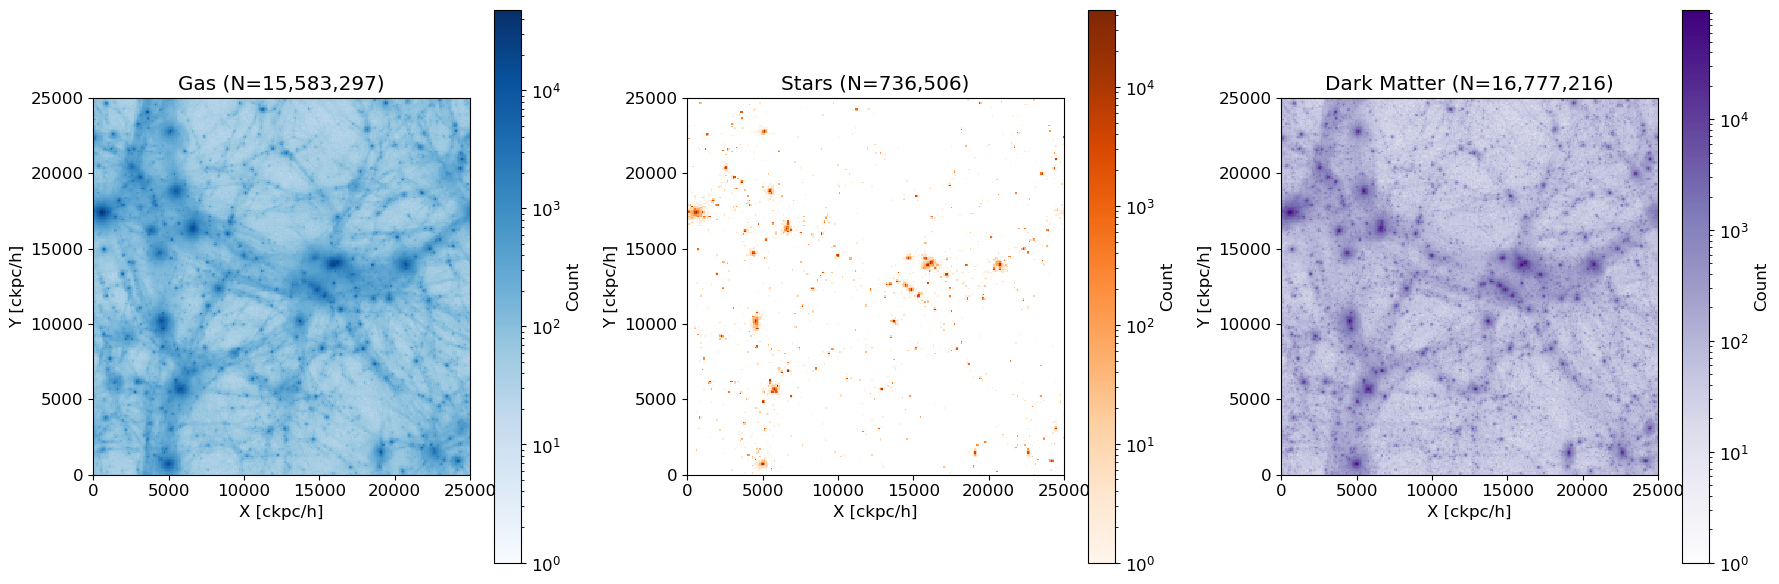

In [13]:
# Create a comparison plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

slice_thickness = None  # 2 Mpc/h
box_center = box_size / 2
bins = 256

particle_data = [
    (gas_positions, 'Gas', 'Blues'),
    (star_positions, 'Stars', 'Oranges'),
    (dm_positions, 'Dark Matter', 'Purples')
]

for ax, (positions, label, cmap) in zip(axes, particle_data):
    # Slice
    sliced_pos = positions
    
    # Histogram
    H, _, _ = np.histogram2d(
        sliced_pos[:, 0], 
        sliced_pos[:, 1],
        bins=bins,
        range=[[0, box_size], [0, box_size]]
    )
    
    # Plot
    im = ax.imshow(
        H.T,
        origin='lower',
        extent=[0, box_size, 0, box_size],
        cmap=cmap,
        norm=LogNorm(vmin=1, vmax=H.max()),
        interpolation='nearest'
    )
    
    ax.set_xlabel('X [ckpc/h]')
    ax.set_ylabel('Y [ckpc/h]')
    ax.set_title(f'{label} (N={len(sliced_pos):,})')
    
    plt.colorbar(im, ax=ax, label='Count')

plt.tight_layout()
plt.show()

## Halos and Subhalos

### What are Halos?

**Halos** are gravitationally bound structures identified using the Friends-of-Friends (FoF) algorithm. They represent:
- Dark matter concentrations
- Galaxy groups and clusters
- The largest structures in the simulation

### What are Subhalos?

**Subhalos** are identified using the SUBFIND algorithm and represent:
- Individual galaxies within halos
- Smaller self-bound structures
- The actual galaxies we observe

The relationship: **One halo can contain multiple subhalos** (central + satellites)

In [14]:
# Load halo catalog
with h5py.File(groups_file, 'r') as f:
    print("Groups file structure:")
    print(list(f.keys()))
    print("\nGroup fields:")
    print(list(f['Group'].keys()))
    print("\nSubhalo fields:")
    print(list(f['Subhalo'].keys()))

Groups file structure:
['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']

Group fields:
['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']

Subhalo fields:
['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', '

In [15]:
def load_halo_data(groups_path, field, halo_or_subhalo='Group'):
    """
    Load halo or subhalo catalog data.
    
    Parameters:
    -----------
    groups_path : str
        Path to groups file
    field : str
        Field name to load
    halo_or_subhalo : str
        'Group' for halos or 'Subhalo' for subhalos
    """
    with h5py.File(groups_path, 'r') as f:
        data = f[f'{halo_or_subhalo}/{field}'][:]
    return data

# Load halo information
halo_masses = load_halo_data(groups_file, 'GroupMass')  # in 10^10 Msun/h
halo_positions = load_halo_data(groups_file, 'GroupPos')
halo_nsubs = load_halo_data(groups_file, 'GroupNsubs')  # Number of subhalos

# Load subhalo information
subhalo_masses = load_halo_data(groups_file, 'SubhaloMass', 'Subhalo')
subhalo_positions = load_halo_data(groups_file, 'SubhaloPos', 'Subhalo')
subhalo_stellarmass = load_halo_data(groups_file, 'SubhaloMassType', 'Subhalo')[:, 4]  # Stars

print(f"Number of halos: {len(halo_masses):,}")
print(f"Number of subhalos: {len(subhalo_masses):,}")
print(f"\nMost massive halo: {halo_masses.max():.2e} x 10^10 Msun/h")
print(f"Most massive subhalo: {subhalo_masses.max():.2e} x 10^10 Msun/h")
print(f"\nHalo with most subhalos: {halo_nsubs.max()} subhalos")

Number of halos: 18,180
Number of subhalos: 15,712

Most massive halo: 6.90e+03 x 10^10 Msun/h
Most massive subhalo: 6.42e+03 x 10^10 Msun/h

Halo with most subhalos: 340 subhalos


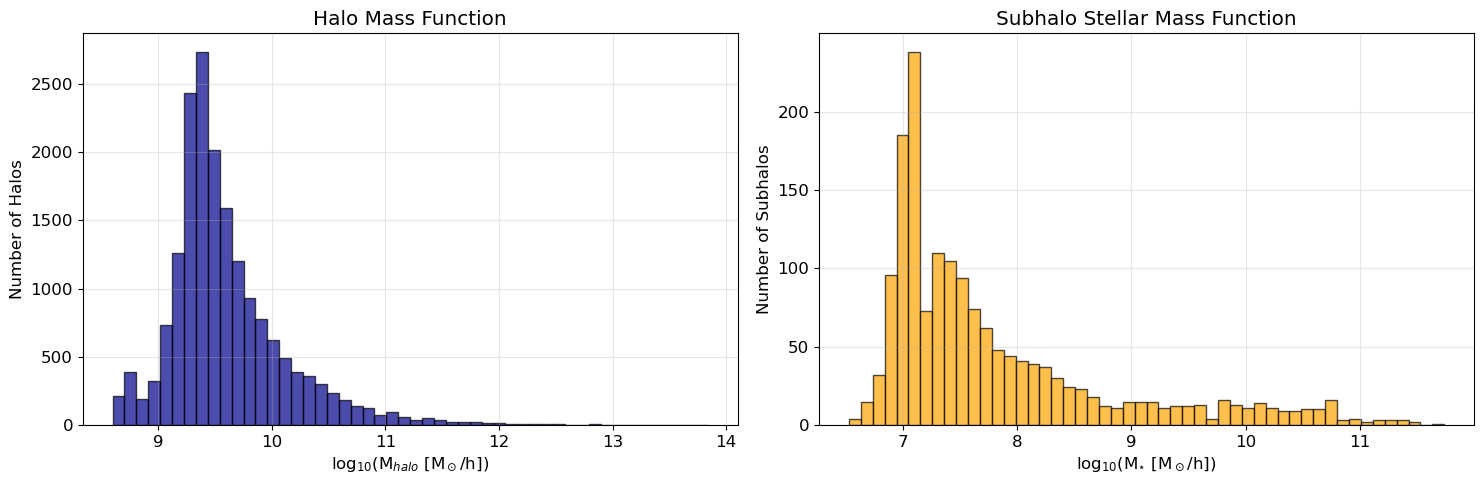

Fraction of subhalos with stars: 10.51%


In [16]:
# Plot halo mass function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Halo mass histogram
ax1.hist(np.log10(halo_masses * 1e10), bins=50, alpha=0.7, color='darkblue', edgecolor='black')
ax1.set_xlabel(r'log$_{10}$(M$_{halo}$ [M$_\odot$/h])')
ax1.set_ylabel('Number of Halos')
ax1.set_title('Halo Mass Function')
ax1.grid(True, alpha=0.3)

# Subhalo stellar mass histogram (only for subhalos with stars)
stellar_mask = subhalo_stellarmass > 0
ax2.hist(np.log10(subhalo_stellarmass[stellar_mask] * 1e10), 
         bins=50, alpha=0.7, color='orange', edgecolor='black')
ax2.set_xlabel(r'log$_{10}$(M$_{\star}$ [M$_\odot$/h])')
ax2.set_ylabel('Number of Subhalos')
ax2.set_title('Subhalo Stellar Mass Function')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Fraction of subhalos with stars: {stellar_mask.sum() / len(stellar_mask):.2%}")

### Visualizing Halos and Subhalos

Let's plot the positions of halos and subhalos, with sizes proportional to their mass.

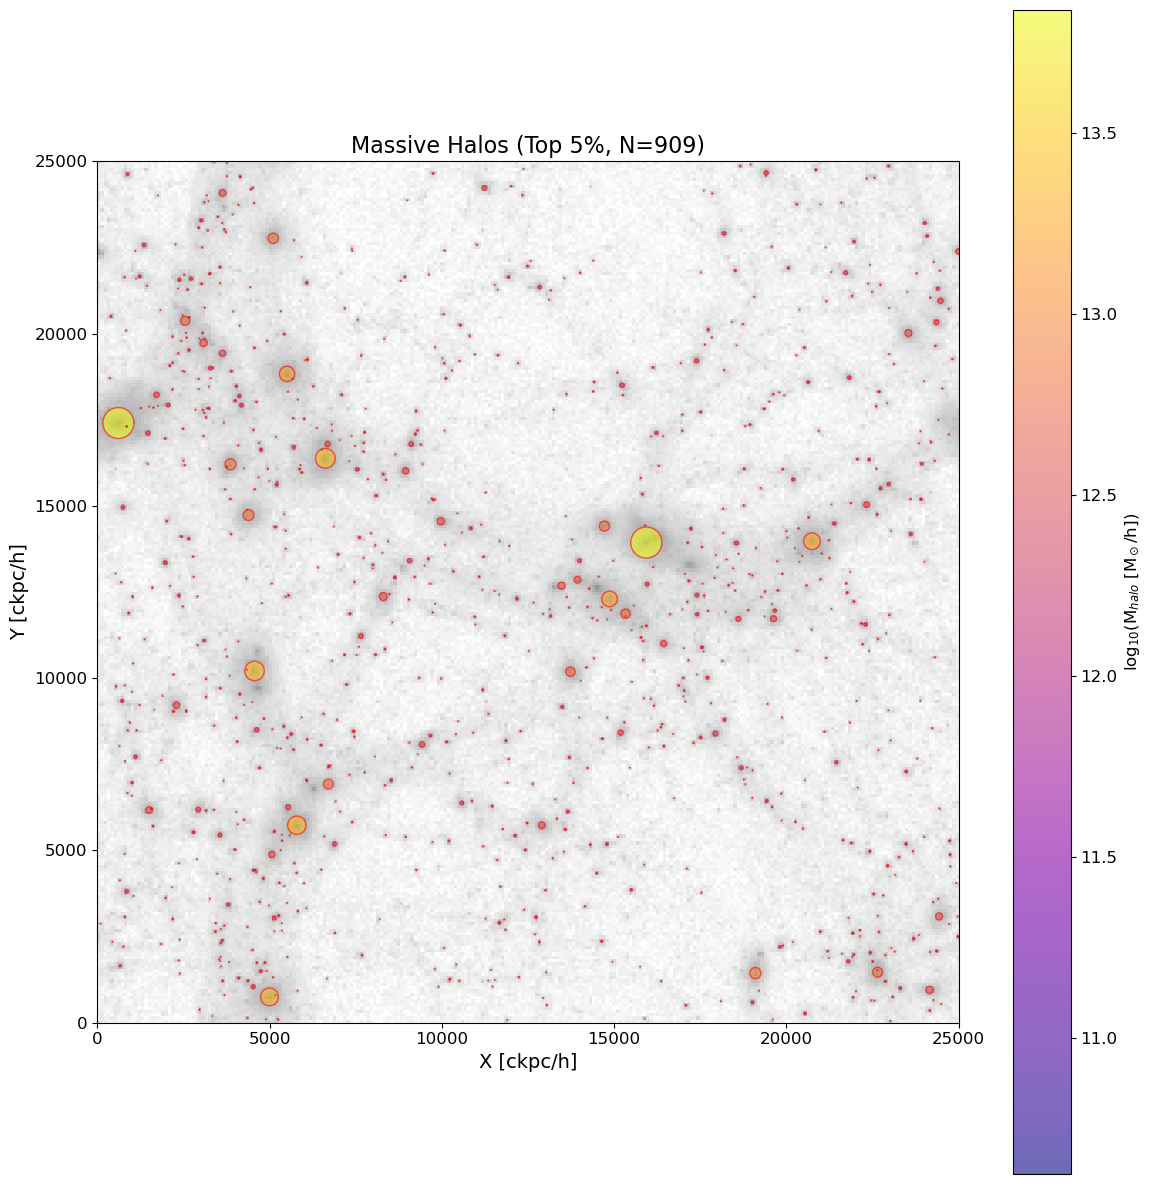

In [17]:
# Select massive halos for visualization
mass_threshold = np.percentile(halo_masses, 95)  # Top 5% by mass
massive_halos = halo_masses > mass_threshold

fig, ax = plt.subplots(figsize=(12, 12))

# Plot dark matter background (downsampled for speed)
subsample = 10
dm_sub = dm_positions[::subsample]
H, _, _ = np.histogram2d(
    dm_sub[:, 0], dm_sub[:, 1],
    bins=256,
    range=[[0, box_size], [0, box_size]]
)

ax.imshow(
    H.T,
    origin='lower',
    extent=[0, box_size, 0, box_size],
    cmap='Greys',
    alpha=0.5,
    norm=LogNorm()
)

# Overlay massive halos
halo_sizes = (halo_masses[massive_halos] / halo_masses.max()) * 500
scatter = ax.scatter(
    halo_positions[massive_halos, 0],
    halo_positions[massive_halos, 1],
    s=halo_sizes,
    c=np.log10(halo_masses[massive_halos] * 1e10),
    cmap='plasma',
    alpha=0.6,
    edgecolors='red',
    linewidths=1
)

ax.set_xlabel('X [ckpc/h]', fontsize=14)
ax.set_ylabel('Y [ckpc/h]', fontsize=14)
ax.set_title(f'Massive Halos (Top 5%, N={massive_halos.sum()})', fontsize=16)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'log$_{10}$(M$_{halo}$ [M$_\odot$/h])', fontsize=12)

plt.tight_layout()
plt.show()

## Zooming into a Massive Halo

Let's select the most massive halo and examine its properties in detail.

In [18]:
# Find the most massive halo
most_massive_idx = np.argmax(halo_masses)
halo_mass = halo_masses[most_massive_idx]
halo_pos = halo_positions[most_massive_idx]
halo_nsub = halo_nsubs[most_massive_idx]

print(f"Most Massive Halo Properties:")
print(f"  Index: {most_massive_idx}")
print(f"  Mass: {halo_mass:.2e} x 10^10 Msun/h = {halo_mass*1e10:.2e} Msun/h")
print(f"  Position: ({halo_pos[0]:.1f}, {halo_pos[1]:.1f}, {halo_pos[2]:.1f}) ckpc/h")
print(f"  Number of subhalos: {halo_nsub}")

# Load R200 (virial radius)
with h5py.File(groups_file, 'r') as f:
    if 'Group/Group_R_Crit200' in f:
        r200 = f['Group/Group_R_Crit200'][most_massive_idx]
        print(f"  R200: {r200:.1f} ckpc/h")
    else:
        r200 = 1000  # Default value if not available
        print(f"  Using default R200: {r200:.1f} ckpc/h")

Most Massive Halo Properties:
  Index: 1
  Mass: 6.90e+03 x 10^10 Msun/h = 6.90e+13 Msun/h
  Position: (15932.8, 13934.8, 2222.8) ckpc/h
  Number of subhalos: 340
  R200: 621.2 ckpc/h


In [19]:
# Select particles within the halo region
zoom_radius = 3 * r200  # Look at 3x the virial radius

def select_particles_in_region(positions, center, radius):
    """Select particles within a spherical region."""
    dx = positions - center
    # Handle periodic boundary conditions
    dx[dx > box_size/2] -= box_size
    dx[dx < -box_size/2] += box_size
    r = np.sqrt(np.sum(dx**2, axis=1))
    return r < radius

# Select particles
gas_mask = select_particles_in_region(gas_positions, halo_pos, zoom_radius)
star_mask = select_particles_in_region(star_positions, halo_pos, zoom_radius)
dm_mask = select_particles_in_region(dm_positions, halo_pos, zoom_radius)

print(f"\nParticles within {zoom_radius:.0f} ckpc/h of halo center:")
print(f"  Gas: {gas_mask.sum():,}")
print(f"  Stars: {star_mask.sum():,}")
print(f"  Dark Matter: {dm_mask.sum():,}")


Particles within 1864 ckpc/h of halo center:
  Gas: 1,043,416
  Stars: 88,134
  Dark Matter: 1,237,339


### Understanding Boolean Masks

We want to select only particles near our halo. To do this, we use **boolean masks** (also called boolean indexing).

**What's a boolean?**
- A boolean is either `True` or `False`
- Comparisons create booleans: `5 > 3` → `True`, `2 > 10` → `False`

**How masks work:**
```python
# Say we have an array of numbers
numbers = [1, 5, 3, 8, 2]

# Create a mask: which numbers are greater than 4?
mask = numbers > 4
# Result: [False, True, False, True, False]

# Use the mask to select only True values
selected = numbers[mask]
# Result: [5, 8]
```

**For particles:**
1. Calculate distance of each particle from halo center
2. Create mask: `mask = (distance < zoom_radius)`
3. This gives us True/False for each particle
4. Use mask to select nearby particles: `positions[mask]`

The function `select_particles_in_region()` does this for us, handling the tricky periodic boundary conditions (the simulation box wraps around like a video game map).

In [ ]:
# Select particles within the halo region
# We'll look at 3 times the virial radius
zoom_radius = 3 * r200

# Define a function to select particles near a point
def select_particles_in_region(positions, center, radius):
    """
    Select particles within a spherical region.
    
    Parameters:
    - positions: array of particle positions
    - center: center point [x, y, z]
    - radius: how far from center to include
    
    Returns:
    - Boolean mask (True/False for each particle)
    """
    # Calculate displacement from center for each particle
    dx = positions - center
    
    # Handle periodic boundary conditions
    # If a particle is more than halfway across the box, it's actually closer on the other side
    dx[dx > box_size/2] -= box_size    # Wrap around right edge
    dx[dx < -box_size/2] += box_size   # Wrap around left edge
    
    # Calculate distance using Pythagoras theorem
    # For each particle: r = sqrt(dx^2 + dy^2 + dz^2)
    r = np.sqrt(np.sum(dx**2, axis=1))
    
    # Return boolean mask: True if distance < radius
    return r < radius

# Use the function to select particles for each type
# This creates a True/False array for each particle type
gas_mask = select_particles_in_region(gas_positions, halo_pos, zoom_radius)
star_mask = select_particles_in_region(star_positions, halo_pos, zoom_radius)
dm_mask = select_particles_in_region(dm_positions, halo_pos, zoom_radius)

# Count how many particles are selected (how many True values)
# .sum() on a boolean array counts the True values
print(f"\nParticles within {zoom_radius:.0f} ckpc/h of halo center:")
print(f"  Gas: {gas_mask.sum():,}")
print(f"  Stars: {star_mask.sum():,}")
print(f"  Dark Matter: {dm_mask.sum():,}")

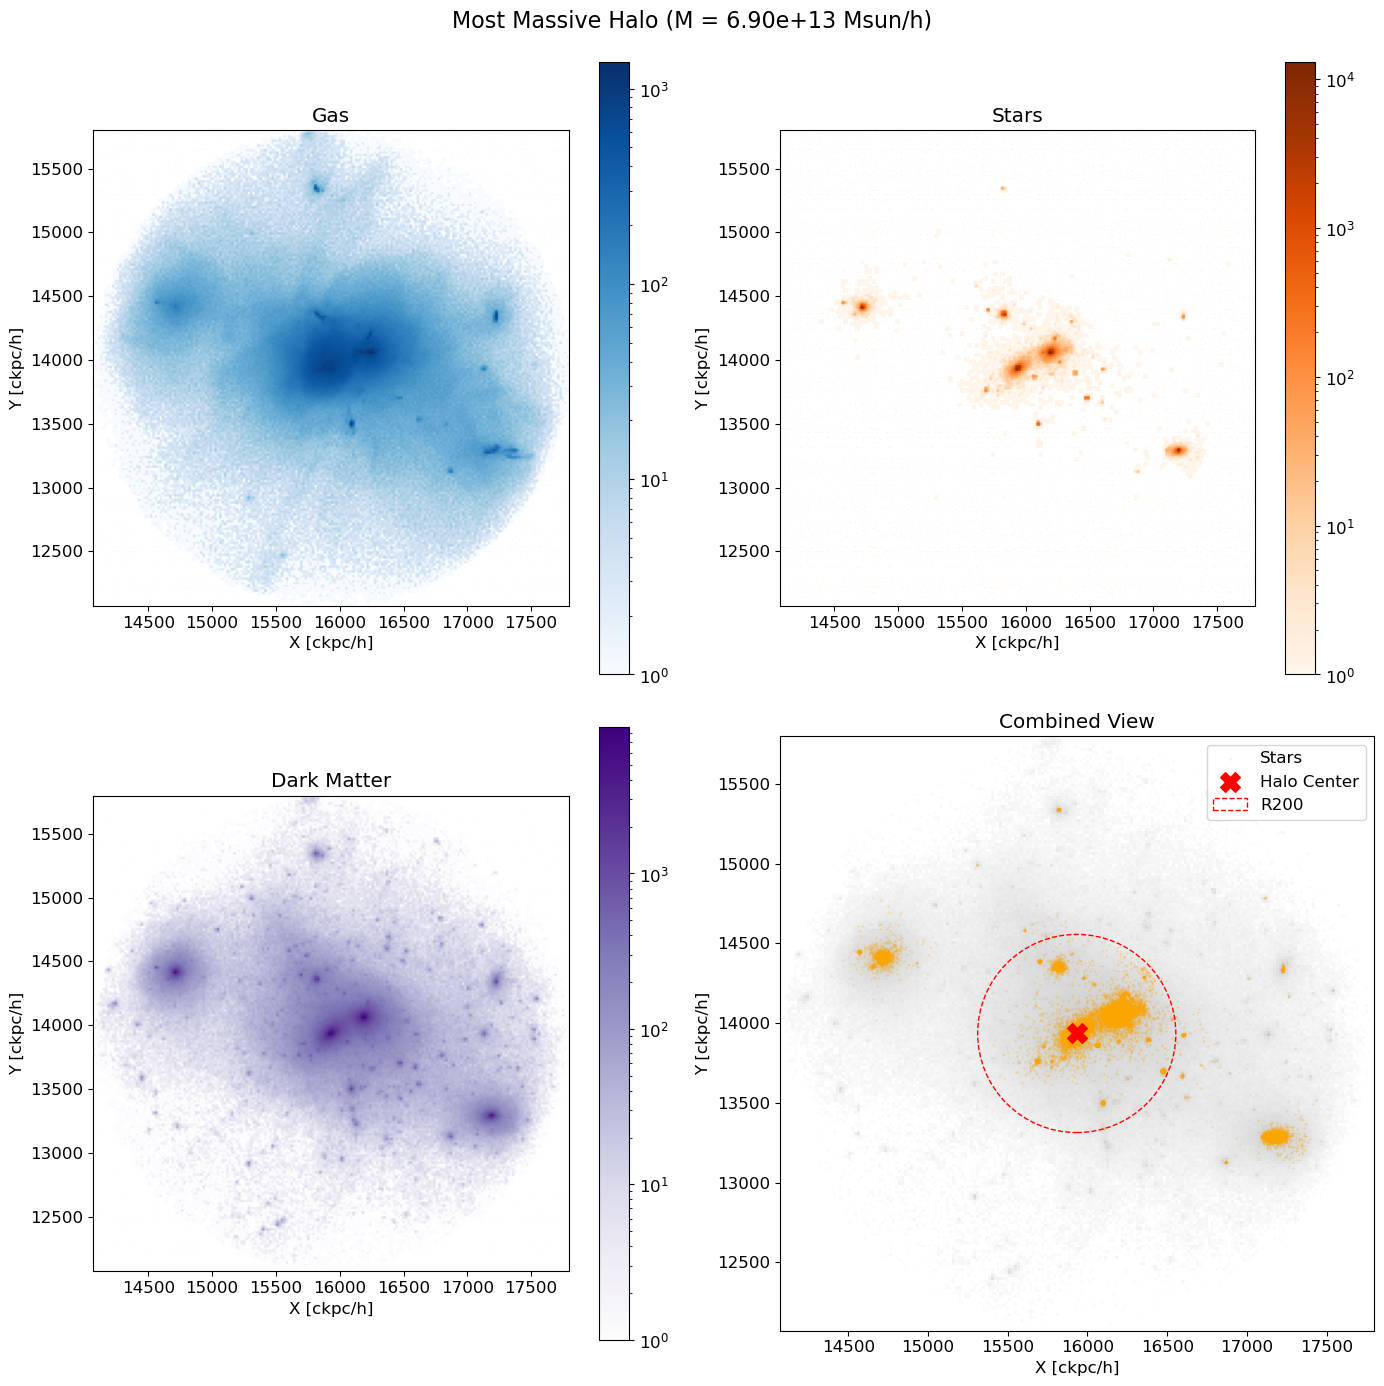

In [20]:
# Create a zoomed-in plot of the massive halo
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Define plot range
plot_range = [[
    halo_pos[0] - zoom_radius, 
    halo_pos[0] + zoom_radius
], [
    halo_pos[1] - zoom_radius, 
    halo_pos[1] + zoom_radius
]]

bins = 200

# Gas
gas_zoom = gas_positions[gas_mask]
H, _, _ = np.histogram2d(gas_zoom[:, 0], gas_zoom[:, 1], bins=bins, range=plot_range)
im0 = axes[0, 0].imshow(H.T, origin='lower', extent=[*plot_range[0], *plot_range[1]], 
                        cmap='Blues', norm=LogNorm(vmin=1))
axes[0, 0].set_title('Gas')
plt.colorbar(im0, ax=axes[0, 0])

# Stars
star_zoom = star_positions[star_mask]
H, _, _ = np.histogram2d(star_zoom[:, 0], star_zoom[:, 1], bins=bins, range=plot_range)
im1 = axes[0, 1].imshow(H.T, origin='lower', extent=[*plot_range[0], *plot_range[1]], 
                        cmap='Oranges', norm=LogNorm(vmin=1))
axes[0, 1].set_title('Stars')
plt.colorbar(im1, ax=axes[0, 1])

# Dark Matter
dm_zoom = dm_positions[dm_mask]
H, _, _ = np.histogram2d(dm_zoom[:, 0], dm_zoom[:, 1], bins=bins, range=plot_range)
im2 = axes[1, 0].imshow(H.T, origin='lower', extent=[*plot_range[0], *plot_range[1]], 
                        cmap='Purples', norm=LogNorm(vmin=1))
axes[1, 0].set_title('Dark Matter')
plt.colorbar(im2, ax=axes[1, 0])

# Combined
axes[1, 1].hist2d(dm_zoom[:, 0], dm_zoom[:, 1], bins=bins, range=plot_range, 
                  cmap='Greys', alpha=0.3, norm=LogNorm())
axes[1, 1].scatter(star_zoom[:, 0], star_zoom[:, 1], s=0.1, c='orange', alpha=0.5, label='Stars')
axes[1, 1].scatter(halo_pos[0], halo_pos[1], s=200, c='red', marker='X', label='Halo Center')
circle = plt.Circle((halo_pos[0], halo_pos[1]), r200, fill=False, color='red', linestyle='--', label='R200')
axes[1, 1].add_patch(circle)
axes[1, 1].set_title('Combined View')
axes[1, 1].legend()

for ax in axes.flat:
    ax.set_xlabel('X [ckpc/h]')
    ax.set_ylabel('Y [ckpc/h]')
    ax.set_aspect('equal')

plt.suptitle(f'Most Massive Halo (M = {halo_mass*1e10:.2e} Msun/h)', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

## Creating Movies: Halo Evolution Across Time

One of the most exciting aspects of cosmological simulations is watching how structures evolve over cosmic time. Let's create a movie showing how a massive halo and its particles change across different snapshots.

### Time Evolution in Simulations

Each snapshot represents the universe at a different redshift (and thus a different time):
- **Higher snapshot numbers** = **Lower redshift** = **More recent times**
- Snapshot 99 is typically z=0 (today)
- Snapshot 14 might be z~4 (when the universe was ~1.5 billion years old)

We'll create an animation showing:
1. How particle distributions evolve
2. How the halo grows in mass
3. How gas, stars, and dark matter change over time

In [ ]:
# First, let's find all available snapshots and their corresponding groups files
import glob  # glob helps us find files matching a pattern

# Use glob to find all snapshot files
# The * is a wildcard that matches any characters
# This finds all files like: snapshot_014.hdf5, snapshot_018.hdf5, etc.
snapshot_files = sorted(glob.glob(os.path.join(sim_path, 'snapshot_*.hdf5')))
groups_files = sorted(glob.glob(os.path.join(sim_path, 'groups_*.hdf5')))

# Extract snapshot numbers from filenames
# This is a "list comprehension" - a compact way to create a list
# Let's break it down:
# 1. For each filename f in snapshot_files
# 2. Get the basename (filename without path): os.path.basename(f)
# 3. Split by underscore: 'snapshot_014.hdf5' becomes ['snapshot', '014.hdf5']
# 4. Take the second part (index [1]): '014.hdf5'
# 5. Split by period: '014.hdf5' becomes ['014', 'hdf5']
# 6. Take the first part (index [0]): '014'
# 7. Convert to integer: 14
snapshot_numbers = []
for f in snapshot_files:
    basename = os.path.basename(f)  # Get just the filename
    parts = basename.split('_')      # Split by underscore
    number_part = parts[1]           # Get the number part
    number_only = number_part.split('.')[0]  # Remove the .hdf5
    snapshot_numbers.append(int(number_only))  # Convert to number and add to list

print(f"Found {len(snapshot_files)} snapshots")
print(f"Snapshot range: {min(snapshot_numbers)} to {max(snapshot_numbers)}")
print(f"\nSnapshot numbers: {snapshot_numbers[:10]}...")  # Show first 10

# Get redshifts and times for each snapshot
redshifts = []  # Empty list to store redshifts
times = []      # Empty list to store times (scale factors)

# Look at the first 5 snapshots to see the pattern
for snap_file in snapshot_files[:5]:
    # Open each file and read its redshift and time
    with h5py.File(snap_file, 'r') as f:
        z = f['Header'].attrs['Redshift']
        t = f['Header'].attrs['Time']  # This is actually the scale factor 'a'
        redshifts.append(z)  # Add to our lists
        times.append(t)

print(f"\nFirst 5 snapshots:")
# Loop through the lists together using zip()
# zip() combines multiple lists element-by-element
for i, (snum, z, a) in enumerate(zip(snapshot_numbers[:5], redshifts, times)):
    age_gyr = 13.8 * a  # Approximate age in Gyr (assuming 13.8 Gyr at a=1)
    print(f"  Snapshot {snum:03d}: z={z:.2f}, a={a:.3f}, age≈{age_gyr:.2f} Gyr")

Found 34 snapshots
Snapshot range: 14 to 90

Snapshot numbers: [14, 18, 24, 28, 32, 34, 36, 38, 40, 42]...

First 5 snapshots:
  Snapshot 014: z=5.99, a=0.143, age≈1.97 Gyr
  Snapshot 018: z=5.00, a=0.167, age≈2.30 Gyr
  Snapshot 024: z=4.00, a=0.200, age≈2.76 Gyr
  Snapshot 028: z=3.50, a=0.222, age≈3.07 Gyr
  Snapshot 032: z=3.00, a=0.250, age≈3.45 Gyr


### Tracking a Halo Across Snapshots

To create a meaningful movie, we need to track the same halo (or its progenitor) across different snapshots. For this tutorial, we'll use a simpler approach:

1. **Identify the most massive halo at the final snapshot** (z=0)
2. **Track particles in that region** back through earlier snapshots
3. **Show how the structure builds up** over time

For more sophisticated tracking, simulations often include merger trees that explicitly link halos across snapshots.

### Understanding Functions

The next cell defines a **function** - a reusable piece of code. Think of it like a recipe:
- You write the recipe once
- You can use it many times with different ingredients

**Function structure:**
```python
def function_name(parameter1, parameter2):
    """
    This is a docstring - it explains what the function does
    """
    # Code that does the work
    return result  # Send back the result
```

**Why use functions?**
- Avoid repeating the same code
- Make code easier to read and understand  
- Fix bugs in one place instead of many places

The function we're about to define is fairly long, but don't worry! We'll break it down:
- It takes information about a snapshot
- It loads particle data
- It creates a 4-panel figure showing gas, dark matter, stars, and a combined view
- It returns the figure and snapshot information

**Note:** Some advanced concepts in this function (like try-except blocks) are for handling errors. If the code encounters a problem (like missing data), it will skip that part instead of crashing.

In [ ]:
def create_halo_frame(snapshot_path, groups_path, center_position, 
                      zoom_radius, bins=200, particle_types_to_plot=[0, 1, 4]):
    """
    Create a single frame showing particle distributions around a halo.
    
    Parameters (the inputs to the function):
    -----------
    snapshot_path : str
        Path to snapshot file (where the particle data is)
    groups_path : str or None
        Path to groups file (where halo information is)
    center_position : array
        (x, y, z) position of halo center - where to look
    zoom_radius : float
        Radius to plot around center - how far to look
    bins : int
        Number of bins for histogram (default 200) - resolution of the image
    particle_types_to_plot : list
        List of particle types to include (0=gas, 1=DM, 4=stars)
    
    Returns (what the function gives back):
    --------
    fig : matplotlib figure
        The generated figure with 4 panels
    snapshot_info : dict
        Information about the snapshot (redshift, time, etc.)
    """
    # Step 1: Get snapshot information by opening the file
    with h5py.File(snapshot_path, 'r') as f:
        redshift = f['Header'].attrs['Redshift']
        scale_factor = f['Header'].attrs['Time']
        box_size_snap = f['Header'].attrs['BoxSize']
    
    # Calculate approximate age of universe at this snapshot
    age_gyr = 13.8 * scale_factor  # 13.8 Gyr is approximate age at scale_factor=1
    
    # Step 2: Define plot range around halo center
    # This creates a box centered on the halo
    plot_range = [[
        center_position[0] - zoom_radius,  # left edge
        center_position[0] + zoom_radius   # right edge
    ], [
        center_position[1] - zoom_radius,  # bottom edge
        center_position[1] + zoom_radius   # top edge
    ]]
    
    # Step 3: Create figure with 2x2 grid (4 panels total)
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    
    # Step 4: Dictionary storing particle type information
    # ID number : (name, colormap for plotting)
    particle_info = {
        0: ('Gas', 'Blues'),
        1: ('Dark Matter', 'Purples'),
        4: ('Stars', 'Oranges')
    }
    
    # Step 5: Define helper function for particle selection
    # This function checks if particles are within our zoom radius
    def select_in_region(pos, center, radius, box_size):
        """Check which particles are near the halo center."""
        # Calculate distance from center
        dx = pos - center
        # Handle periodic boundary conditions (simulation box wraps around)
        dx[dx > box_size/2] -= box_size
        dx[dx < -box_size/2] += box_size
        # Calculate distance
        r = np.sqrt(np.sum(dx**2, axis=1))
        # Return True/False for each particle: is it close enough?
        return r < radius
    
    # Step 6: Load halo information if groups file exists
    halo_mass = None  # Start with no mass info
    if groups_path is not None and os.path.exists(groups_path):
        with h5py.File(groups_path, 'r') as f:
            if 'Group/GroupMass' in f:
                masses = f['Group/GroupMass'][:]
                positions = f['Group/GroupPos'][:]
                # Find closest halo to our center position
                dx = positions - center_position
                dx[dx > box_size_snap/2] -= box_size_snap
                dx[dx < -box_size_snap/2] += box_size_snap
                dist = np.sqrt(np.sum(dx**2, axis=1))
                closest_idx = np.argmin(dist)
                if dist[closest_idx] < zoom_radius:
                    halo_mass = masses[closest_idx]
    
    # Step 7: Plot each particle type (gas, dark matter, stars)
    # zip() pairs up axes with particle info: axes[0] with particle_info[0], etc.
    for ax, (ptype_id, (name, cmap)) in zip(axes.flat[:3], particle_info.items()):
        # Check if we want to plot this particle type
        if ptype_id not in particle_types_to_plot:
            ax.axis('off')  # Turn off this panel if we don't want it
            continue  # Skip to next particle type
        
        # Try-except block: try to load and plot data
        # If something goes wrong (like missing data), the "except" part runs
        try:
            # Load particle positions from the snapshot
            positions = load_particle_data(snapshot_path, ptype_id, 'Coordinates')
            
            # Select only particles near our halo
            mask = select_in_region(positions, center_position, zoom_radius, box_size_snap)
            positions_zoom = positions[mask]
            
            # Create histogram if we have particles
            if len(positions_zoom) > 0:
                # Make a 2D histogram (bins particles into a grid)
                H, _, _ = np.histogram2d(
                    positions_zoom[:, 0],  # x positions
                    positions_zoom[:, 1],  # y positions
                    bins=bins,
                    range=plot_range
                )
                
                # Plot the histogram as an image
                im = ax.imshow(
                    H.T,  # Transpose to get correct orientation
                    origin='lower',  # Put (0,0) at bottom-left
                    extent=[*plot_range[0], *plot_range[1]],  # Set plot limits
                    cmap=cmap,  # Color scheme (Blues, Purples, Oranges)
                    norm=LogNorm(vmin=1, vmax=H.max()) if H.max() > 0 else None,
                    interpolation='nearest'
                )
                plt.colorbar(im, ax=ax, label='Count')
                ax.set_title(f'{name} (N={len(positions_zoom):,})')
            else:
                # No particles found
                ax.text(0.5, 0.5, f'No {name} particles', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(name)
        
        # If anything goes wrong, print the error and show a message        
        except Exception as e:
            print(f"Note: Could not load {name} data - {e}")
            ax.text(0.5, 0.5, f'{name}\nNot available', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(name)
        
        # Add labels to this panel
        ax.set_xlabel('X [ckpc/h]')
        ax.set_ylabel('Y [ckpc/h]')
        ax.set_aspect('equal')  # Make sure x and y scales are the same
    
    # Step 8: Combined view in fourth panel (bottom-right)
    ax_combined = axes.flat[3]  # Get the 4th panel (index 3)
    
    # Try to plot dark matter as background (gray)
    try:
        dm_pos = load_particle_data(snapshot_path, 1, 'Coordinates')
        dm_mask = select_in_region(dm_pos, center_position, zoom_radius, box_size_snap)
        dm_zoom = dm_pos[dm_mask]
        
        H_dm, _, _ = np.histogram2d(dm_zoom[:, 0], dm_zoom[:, 1], 
                                    bins=bins, range=plot_range)
        ax_combined.imshow(H_dm.T, origin='lower', 
                          extent=[*plot_range[0], *plot_range[1]],
                          cmap='Greys', alpha=0.3, norm=LogNorm())
    except:
        pass  # If DM loading fails, just skip it
    
    # Try to overlay stars (orange points)
    try:
        star_pos = load_particle_data(snapshot_path, 4, 'Coordinates')
        star_mask = select_in_region(star_pos, center_position, zoom_radius, box_size_snap)
        star_zoom = star_pos[star_mask]
        if len(star_zoom) > 0:
            ax_combined.scatter(star_zoom[:, 0], star_zoom[:, 1], 
                              s=0.5, c='orange', alpha=0.6, label='Stars')
    except:
        pass  # If stars loading fails, just skip it
    
    # Mark halo center with red X
    ax_combined.scatter(center_position[0], center_position[1], 
                       s=200, c='red', marker='X', label='Center', zorder=10)
    
    # Set up the combined panel
    ax_combined.set_xlabel('X [ckpc/h]')
    ax_combined.set_ylabel('Y [ckpc/h]')
    ax_combined.set_title('Combined View')
    ax_combined.set_aspect('equal')
    ax_combined.set_xlim(plot_range[0])
    ax_combined.set_ylim(plot_range[1])
    ax_combined.legend(loc='upper right')
    
    # Step 9: Add title with time information to the whole figure
    title = f'z = {redshift:.2f}, Age ≈ {age_gyr:.2f} Gyr'
    if halo_mass is not None:
        title += f', M$_{{halo}}$ = {halo_mass*1e10:.2e} M$_\\odot$/h'
    
    plt.suptitle(title, fontsize=16, y=0.995)
    plt.tight_layout()
    
    # Step 10: Package up information to return
    snapshot_info = {
        'redshift': redshift,
        'scale_factor': scale_factor,
        'age_gyr': age_gyr,
        'halo_mass': halo_mass
    }
    
    # Return both the figure and the information dictionary
    return fig, snapshot_info

print("Frame creation function defined!")
print("We can now use create_halo_frame() to make visualizations.")

Frame creation function defined!


Testing with snapshot: snapshot_090.hdf5


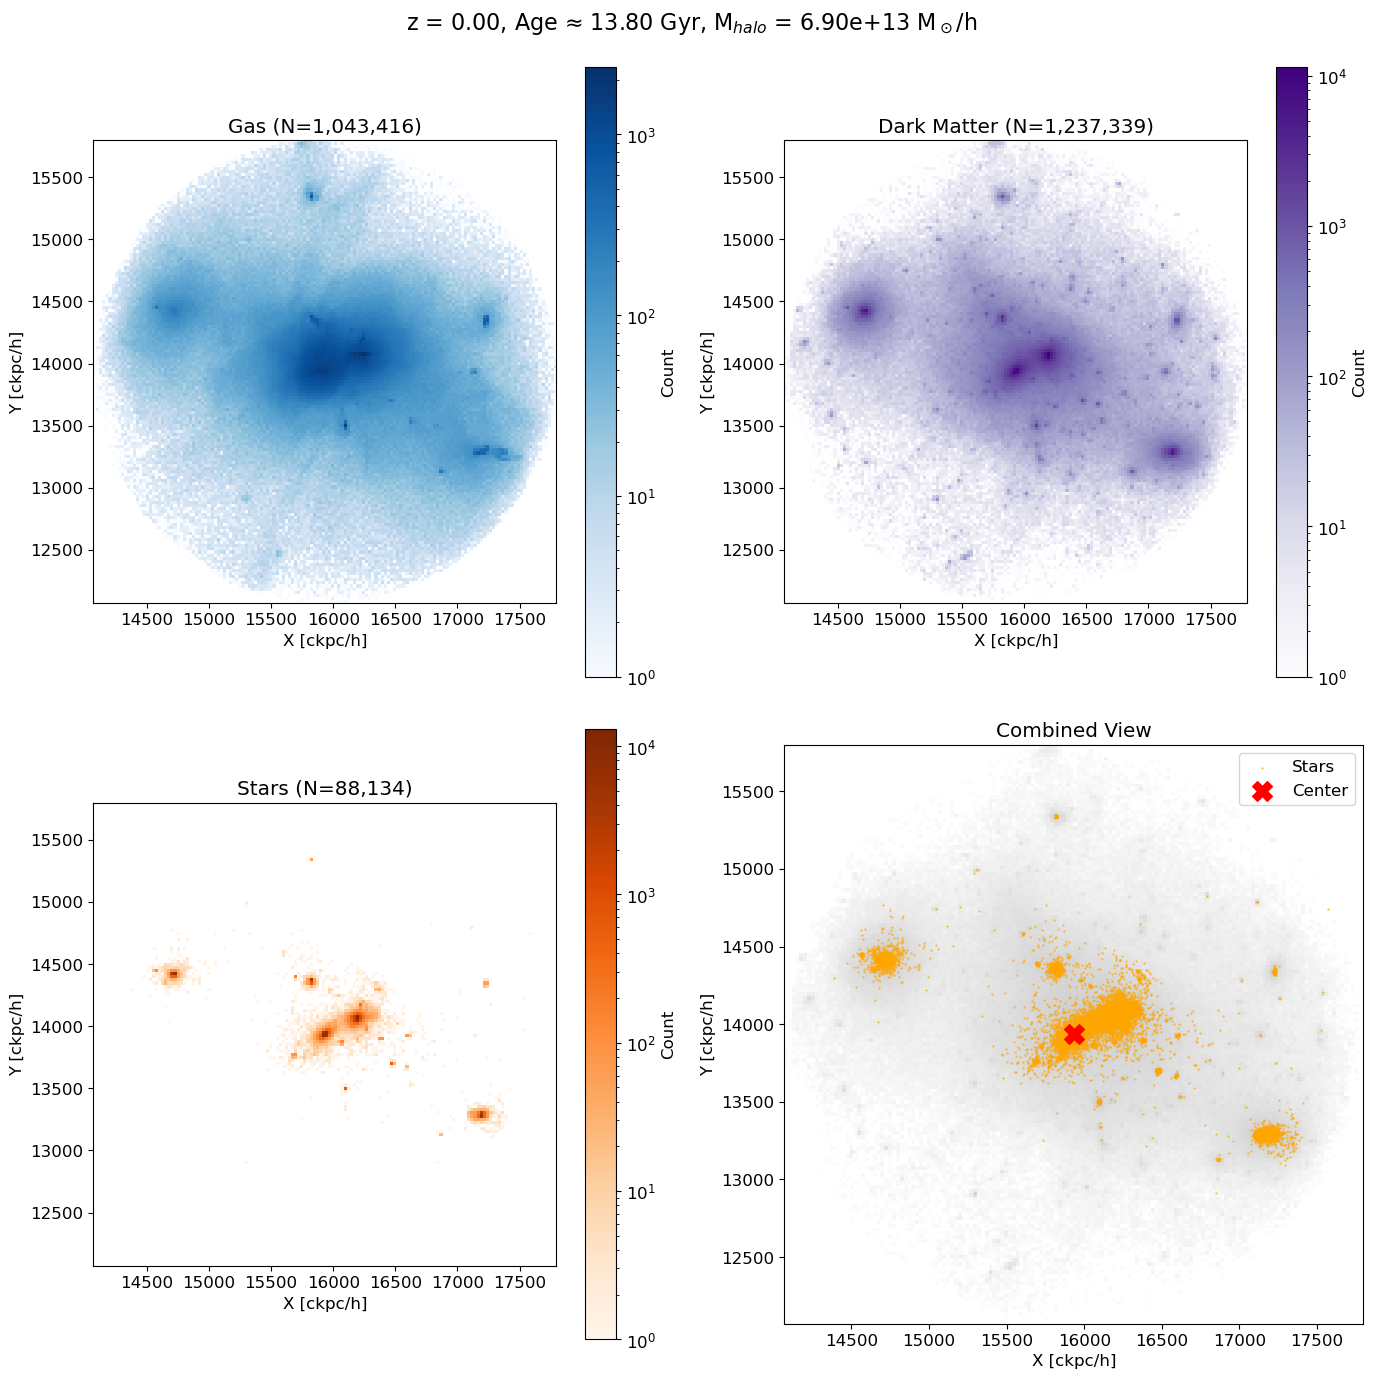


Snapshot info:
  redshift: 2.220446049250313e-16
  scale_factor: 0.9999999999999998
  age_gyr: 13.799999999999997
  halo_mass: 6897.03662109375


In [ ]:
# Test the function with one snapshot
# We'll use the most massive halo position from earlier

# Select which snapshot to visualize
# -1 means the last item in the list (the most recent snapshot)
test_snapshot = snapshot_files[-1]
test_groups = groups_files[-1] if len(groups_files) > 0 else None

print(f"Testing with snapshot: {os.path.basename(test_snapshot)}")

# Call our function!
# We pass in:
# - test_snapshot: which file to read
# - test_groups: where to find halo information
# - halo_pos: where to center the view (from earlier in notebook)
# - zoom_radius: how far to look around the center
# - bins: how many pixels in each direction
fig, info = create_halo_frame(
    test_snapshot,
    test_groups,
    halo_pos,           # Center position from the massive halo we found earlier
    zoom_radius=3*r200, # Look at 3 times the virial radius
    bins=150
)

# Show the figure
plt.show()

# Print the information dictionary that was returned
print(f"\nSnapshot info:")
for key, val in info.items():
    print(f"  {key}: {val}")

### Creating the Animation

Now let's create frames for all available snapshots and combine them into a movie. We'll use matplotlib's animation functionality to create an animated visualization.

### Understanding Animations

An animation is just a series of images (frames) shown one after another, like a flipbook!

**How we'll create the animation:**

1. **Generate frames**: Use our `create_halo_frame()` function for each snapshot
2. **Store data**: Keep the particle information for each frame in a list
3. **Create animation**: Use matplotlib's `FuncAnimation` to combine frames
4. **Save as GIF**: Export the animation as a .gif file

**What's a GIF?**
- GIF = Graphics Interchange Format
- A file format that can contain multiple images
- Plays them in sequence to create an animation
- Can be viewed in any web browser

**The function below is quite long**, but here's what it does:
- Loops through snapshot files (one at a time)
- Loads particle data for each snapshot
- Creates histograms (2D grids counting particles)
- Stores everything in a list called `frames_data`
- Creates an animation from all the frames
- Saves it as a GIF file

**Advanced concept:** The function uses `try-except` blocks to handle errors gracefully. If data is missing for a snapshot, it skips it instead of crashing.

In [44]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, Image
import time

def create_halo_evolution_movie(snapshot_files, groups_files, center_position, 
                                zoom_radius, output_filename='halo_evolution.gif',
                                fps=2, max_snapshots=None):
    """
    Create an animated movie showing halo evolution across snapshots.
    
    Parameters:
    -----------
    snapshot_files : list
        List of snapshot file paths
    groups_files : list
        List of groups file paths (must match snapshot order)
    center_position : array
        (x, y, z) position to center the view
    zoom_radius : float
        Radius around center to visualize
    output_filename : str
        Output filename for the animation
    fps : int
        Frames per second for the animation
    max_snapshots : int or None
        Maximum number of snapshots to include (for testing)
    
    Returns:
    --------
    animation : matplotlib.animation.FuncAnimation
        The created animation object
    """
    # Limit snapshots if requested
    if max_snapshots is not None:
        snapshot_files = snapshot_files[-max_snapshots:]
        groups_files = groups_files[-max_snapshots:] if len(groups_files) > 0 else []
    
    # Prepare the figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    
    # Store frame data
    frames_data = []
    
    print(f"Generating frames for {len(snapshot_files)} snapshots...")
    start_time = time.time()
    
    for i, snap_file in enumerate(snapshot_files):
        # Find matching groups file
        snap_num = int(os.path.basename(snap_file).split('_')[1].split('.')[0])
        groups_file = None
        for gf in groups_files:
            g_num = int(os.path.basename(gf).split('_')[1].split('.')[0])
            if g_num == snap_num:
                groups_file = gf
                break
        
        # Get snapshot info
        with h5py.File(snap_file, 'r') as f:
            redshift = f['Header'].attrs['Redshift']
            scale_factor = f['Header'].attrs['Time']
            box_size_snap = f['Header'].attrs['BoxSize']
        
        age_gyr = 13.8 * scale_factor
        
        # Load and process particle data
        frame_data = {
            'redshift': redshift,
            'age_gyr': age_gyr,
            'snap_num': snap_num,
            'particle_data': {}
        }
        
        # Load halo mass if available
        if groups_file is not None and os.path.exists(groups_file):
            with h5py.File(groups_file, 'r') as f:
                if 'Group/GroupMass' in f:
                    masses = f['Group/GroupMass'][:]
                    positions = f['Group/GroupPos'][:]
                    dx = positions - center_position
                    dx[dx > box_size_snap/2] -= box_size_snap
                    dx[dx < -box_size_snap/2] += box_size_snap
                    dist = np.sqrt(np.sum(dx**2, axis=1))
                    closest_idx = np.argmin(dist)
                    if dist[closest_idx] < zoom_radius:
                        frame_data['halo_mass'] = masses[closest_idx]
        
        # Load particle positions for each type
        plot_range = [[center_position[0] - zoom_radius, center_position[0] + zoom_radius],
                     [center_position[1] - zoom_radius, center_position[1] + zoom_radius]]
        
        for ptype, name in [(0, 'Gas'), (1, 'DM'), (4, 'Stars')]:
            try:
                positions = load_particle_data(snap_file, ptype, 'Coordinates')
                
                # Select particles in region
                dx = positions - center_position
                dx[dx > box_size_snap/2] -= box_size_snap
                dx[dx < -box_size_snap/2] += box_size_snap
                r = np.sqrt(np.sum(dx**2, axis=1))
                mask = r < zoom_radius
                positions_zoom = positions[mask]
                
                # Create histogram
                if len(positions_zoom) > 0:
                    H, xedges, yedges = np.histogram2d(
                        positions_zoom[:, 0], positions_zoom[:, 1],
                        bins=150, range=plot_range
                    )
                    frame_data['particle_data'][ptype] = {
                        'histogram': H,
                        'extent': [*plot_range[0], *plot_range[1]],
                        'count': len(positions_zoom),
                        'positions': positions_zoom if ptype == 4 else None  # Store stars for scatter
                    }
            except:
                frame_data['particle_data'][ptype] = None
        
        frames_data.append(frame_data)
        
        if (i + 1) % 5 == 0:
            print(f"  Processed {i+1}/{len(snapshot_files)} snapshots...")
    
    elapsed = time.time() - start_time
    print(f"Frame generation complete in {elapsed:.1f} seconds!")
    
    # Animation update function
    def update(frame_idx):
        for ax in axes.flat:
            ax.clear()
        
        frame = frames_data[frame_idx]
        
        particle_info = {
            0: ('Gas', 'Blues', axes[0, 0]),
            1: ('Dark Matter', 'Purples', axes[1, 0]),
            4: ('Stars', 'Oranges', axes[0, 1])
        }
        
        # Plot each particle type
        for ptype, (name, cmap, ax) in particle_info.items():
            data = frame['particle_data'].get(ptype)
            
            if data is not None and 'histogram' in data:
                H = data['histogram']
                extent = data['extent']
                
                if H.max() > 0:
                    im = ax.imshow(
                        H.T, origin='lower', extent=extent,
                        cmap=cmap, norm=LogNorm(vmin=1, vmax=H.max()),
                        interpolation='nearest'
                    )
                    ax.set_title(f"{name} (N={data['count']:,})")
                else:
                    ax.text(0.5, 0.5, f'No {name}', ha='center', va='center', 
                           transform=ax.transAxes)
                    ax.set_title(name)
            else:
                ax.text(0.5, 0.5, f'{name}\nNo data', ha='center', va='center',
                       transform=ax.transAxes)
                ax.set_title(name)
            
            ax.set_xlabel('X [ckpc/h]')
            ax.set_ylabel('Y [ckpc/h]')
            ax.set_aspect('equal')
        
        # Combined view
        ax_comb = axes[1, 1]
        
        # DM background
        dm_data = frame['particle_data'].get(1)
        if dm_data is not None and 'histogram' in dm_data:
            H_dm = dm_data['histogram']
            if H_dm.max() > 0:
                ax_comb.imshow(H_dm.T, origin='lower', extent=dm_data['extent'],
                             cmap='Greys', alpha=0.3, norm=LogNorm())
        
        # Stars overlay
        star_data = frame['particle_data'].get(4)
        if star_data is not None and star_data['positions'] is not None:
            pos = star_data['positions']
            ax_comb.scatter(pos[:, 0], pos[:, 1], s=0.5, c='orange', alpha=0.6)
        
        # Center marker
        ax_comb.scatter(center_position[0], center_position[1], 
                       s=200, c='red', marker='X', zorder=10)
        
        plot_range = frames_data[0]['particle_data'][1]['extent'] if 1 in frames_data[0]['particle_data'] else None
        if plot_range:
            ax_comb.set_xlim(plot_range[0], plot_range[1])
            ax_comb.set_ylim(plot_range[2], plot_range[3])
        
        ax_comb.set_xlabel('X [ckpc/h]')
        ax_comb.set_ylabel('Y [ckpc/h]')
        ax_comb.set_title('Combined')
        ax_comb.set_aspect('equal')
        
        # Title
        title = f"Snapshot {frame['snap_num']:03d}: z = {frame['redshift']:.2f}, Age ≈ {frame['age_gyr']:.2f} Gyr"
        if 'halo_mass' in frame:
            title += f"\nM$_{{halo}}$ = {frame['halo_mass']*1e10:.2e} M$_\\odot$/h"
        
        fig.suptitle(title, fontsize=16, y=0.995)
        
        return axes.flat
    
    # Create animation
    print(f"\nCreating animation with {len(frames_data)} frames...")
    anim = FuncAnimation(fig, update, frames=len(frames_data), 
                        interval=1000/fps, blit=False, repeat=True)
    
    # Save as GIF
    print(f"Saving animation to {output_filename}...")
    writer = PillowWriter(fps=fps)
    anim.save(output_filename, writer=writer)
    print(f"Animation saved successfully!")
    
    return anim

# Create the movie (using a subset of snapshots for speed)
print("Creating halo evolution movie...")
print("Note: Using last 10 snapshots for demonstration. Set max_snapshots=None for all snapshots.\n")

animation = create_halo_evolution_movie(
    snapshot_files,
    groups_files,
    center_position=halo_pos,
    zoom_radius=3*r200,
    output_filename='halo_evolution.gif',
    fps=2,  # 2 frames per second
    max_snapshots=10  # Only use last 10 snapshots for demo (remove this for full movie)
)

plt.close()  # Close the figure to prevent duplicate display

print("\n✅ Movie created! Check 'halo_evolution.gif' in your working directory.")

Creating halo evolution movie...
Note: Using last 10 snapshots for demonstration. Set max_snapshots=None for all snapshots.

Generating frames for 10 snapshots...
  Processed 5/10 snapshots...
  Processed 10/10 snapshots...
Frame generation complete in 99.1 seconds!

Creating animation with 10 frames...
Saving animation to halo_evolution.gif...
Animation saved successfully!

✅ Movie created! Check 'halo_evolution.gif' in your working directory.


Displaying the animation:


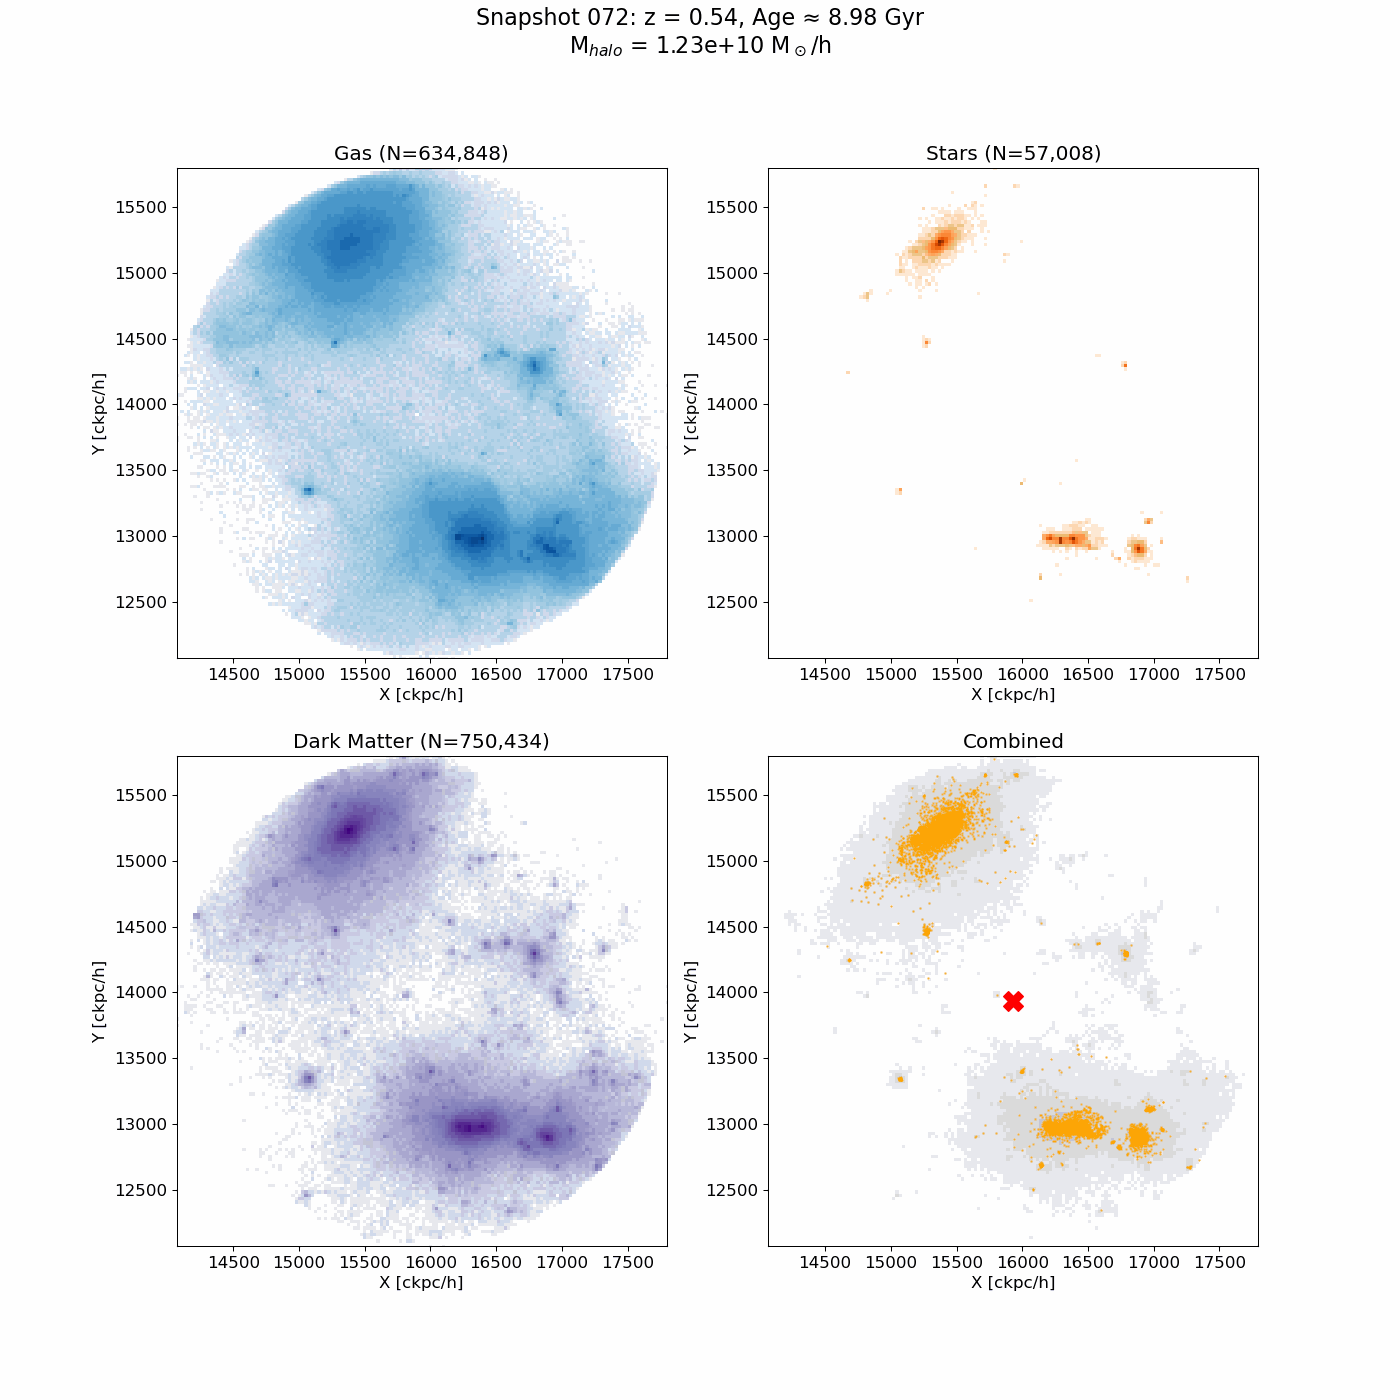

In [45]:
# Display the animation in the notebook
from IPython.display import Image as IPImage

# Display the GIF
print("Displaying the animation:")
IPImage(filename='halo_evolution.gif')

### Customization Tips

You can modify the movie creation to:

1. **Include all snapshots**: Remove or increase `max_snapshots` parameter
2. **Change the frame rate**: Adjust `fps` (frames per second)
3. **Focus on different regions**: Change `center_position` and `zoom_radius`
4. **Track different halos**: Select a different halo from the catalog
5. **Add more particle types**: Include black holes (type 5) or tracers (type 3)
6. **Create higher resolution**: Increase `bins` parameter in histograms
7. **Save as MP4**: Use `FFMpegWriter` instead of `PillowWriter` (requires ffmpeg)

**Example: Creating a full movie with all snapshots**
```python
# Uncomment to create full movie (this may take several minutes!)
# full_animation = create_halo_evolution_movie(
#     snapshot_files,
#     groups_files,
#     center_position=halo_pos,
#     zoom_radius=3*r200,
#     output_filename='halo_evolution_full.gif',
#     fps=3,
#     max_snapshots=None  # Use all snapshots
# )
```

### Understanding the Movie

As you watch the animation, notice:
- **Dark matter** forms the scaffolding first
- **Gas** accumulates in the halo's potential well
- **Stars** form later from the gas
- The structure becomes more concentrated over time
- The halo mass increases as it accretes material

### Alternative: Static Comparison Across Multiple Snapshots

If you prefer a static comparison instead of an animation, you can create a multi-panel figure showing the halo at different epochs:

### Understanding the Static Comparison

Instead of an animation (moving images), we can create a **static comparison** - showing multiple snapshots side-by-side in one figure.

**Why might you want this?**
- Easier to compare specific features across time
- Can be printed or included in presentations
- Doesn't require video playback

**How it works:**
1. Select a few snapshots evenly spaced in time (we'll use 6)
2. Create a 2x3 grid (2 rows, 3 columns = 6 panels)
3. Plot each snapshot in one panel
4. Show stars (orange dots) on top of dark matter (gray background)

**Key concepts:**
- `np.linspace()`: Creates evenly spaced numbers. For example, `np.linspace(0, 10, 6)` gives us 6 numbers between 0 and 10
- `enumerate(zip(...))`: Lets us loop through multiple lists at once and get an index number
- `axes.flatten()`: Converts a 2D array of plot axes into a 1D list for easy looping

In [ ]:
# Create a static comparison of the halo at different epochs
# We'll select 6 snapshots evenly spaced in time

# Decide how many snapshots to show
n_snapshots_to_show = 6

# Create evenly spaced indices
# If we have 34 snapshots (0 to 33), this gives us indices like: 0, 6, 13, 20, 27, 33
indices = np.linspace(0, len(snapshot_files)-1, n_snapshots_to_show, dtype=int)

# Select the snapshot files at those indices
# This is a list comprehension - it creates a new list
selected_snapshots = [snapshot_files[i] for i in indices]

# Do the same for groups files
# Check if we have groups files first
if len(groups_files) >= len(snapshot_files):
    selected_groups = [groups_files[i] for i in indices]
else:
    # If no groups files, create a list of None values
    selected_groups = [None] * n_snapshots_to_show

# Create a figure with 2 rows and 3 columns (6 panels total)
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Flatten the 2D array of axes into a 1D list
# This makes it easier to loop through: axes[0], axes[1], axes[2], etc.
axes = axes.flatten()

print(f"Creating comparison of {n_snapshots_to_show} snapshots...")

# Loop through selected snapshots, groups files, and axes together
# enumerate() gives us both the index (idx) and the items
for idx, (snap_file, groups_file, ax) in enumerate(zip(selected_snapshots, selected_groups, axes)):
    
    # Get snapshot information
    with h5py.File(snap_file, 'r') as f:
        redshift = f['Header'].attrs['Redshift']
        scale_factor = f['Header'].attrs['Time']
        box_size_snap = f['Header'].attrs['BoxSize']
    
    # Calculate age
    age_gyr = 13.8 * scale_factor
    
    # Extract snapshot number from filename
    snap_num = int(os.path.basename(snap_file).split('_')[1].split('.')[0])
    
    # Try to load halo mass if groups file exists
    halo_mass_snap = None
    if groups_file is not None and os.path.exists(groups_file):
        try:
            with h5py.File(groups_file, 'r') as f:
                masses = f['Group/GroupMass'][:]
                positions = f['Group/GroupPos'][:]
                # Find closest halo to our halo position
                dx = positions - halo_pos
                dx[dx > box_size_snap/2] -= box_size_snap
                dx[dx < -box_size_snap/2] += box_size_snap
                dist = np.sqrt(np.sum(dx**2, axis=1))
                closest_idx = np.argmin(dist)
                if dist[closest_idx] < zoom_radius:
                    halo_mass_snap = masses[closest_idx]
        except:
            pass  # If loading fails, just continue without mass info
    
    # Define the region to plot
    plot_range = [[halo_pos[0] - zoom_radius, halo_pos[0] + zoom_radius],
                 [halo_pos[1] - zoom_radius, halo_pos[1] + zoom_radius]]
    
    # Plot dark matter background
    try:
        # Load dark matter positions
        dm_pos = load_particle_data(snap_file, 1, 'Coordinates')
        
        # Calculate distances accounting for periodic boundaries
        dx = dm_pos - halo_pos
        dx[dx > box_size_snap/2] -= box_size_snap
        dx[dx < -box_size_snap/2] += box_size_snap
        r = np.sqrt(np.sum(dx**2, axis=1))
        
        # Select particles within zoom radius
        mask = r < zoom_radius
        dm_zoom = dm_pos[mask]
        
        # Create 2D histogram
        H_dm, _, _ = np.histogram2d(dm_zoom[:, 0], dm_zoom[:, 1], 
                                   bins=150, range=plot_range)
        
        # Plot as gray background image
        ax.imshow(H_dm.T, origin='lower', extent=[*plot_range[0], *plot_range[1]],
                 cmap='Greys', alpha=0.5, norm=LogNorm(vmin=1))
    except:
        pass  # If DM loading fails, continue without it
    
    # Overlay stars as orange points
    try:
        # Load star positions
        star_pos = load_particle_data(snap_file, 4, 'Coordinates')
        
        # Calculate distances
        dx = star_pos - halo_pos
        dx[dx > box_size_snap/2] -= box_size_snap
        dx[dx < -box_size_snap/2] += box_size_snap
        r = np.sqrt(np.sum(dx**2, axis=1))
        
        # Select particles within zoom radius
        mask = r < zoom_radius
        star_zoom = star_pos[mask]
        
        # Plot stars as scatter points if we have any
        if len(star_zoom) > 0:
            ax.scatter(star_zoom[:, 0], star_zoom[:, 1], 
                      s=1, c='orange', alpha=0.7, label=f'{len(star_zoom):,} stars')
            ax.legend(loc='upper right', fontsize=8)
    except:
        pass  # If star loading fails, continue without it
    
    # Mark the halo center with a red X
    ax.scatter(halo_pos[0], halo_pos[1], s=100, c='red', marker='X', zorder=10)
    
    # Create title with snapshot information
    title = f'Snap {snap_num:03d}: z={redshift:.2f}, Age={age_gyr:.1f} Gyr'
    if halo_mass_snap is not None:
        title += f'\nM={halo_mass_snap*1e10:.1e} M☉/h'
    
    # Set up this panel
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('X [ckpc/h]', fontsize=10)
    ax.set_ylabel('Y [ckpc/h]', fontsize=10)
    ax.set_xlim(plot_range[0])
    ax.set_ylim(plot_range[1])
    ax.set_aspect('equal')
    
    # Print progress
    print(f"  Panel {idx+1}/{n_snapshots_to_show}: z={redshift:.2f}")

# Add overall title to the figure
plt.suptitle('Halo Evolution: Stars (orange) on Dark Matter (gray)', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

print("\n✅ Comparison plot complete!")

### 🎯 Exercise: Analyze Halo Growth

Now it's your turn to write some code! This exercise will help you practice:
- Writing for loops
- Working with lists
- Making plots

**Your Task:** Track how a halo grows over time by measuring its mass at each snapshot.

**Step-by-step approach:**

1. **Create empty lists** to store data:
   ```python
   redshifts = []      # Will hold redshift values
   halo_masses = []    # Will hold mass values
   ```

2. **Loop through snapshots** one at a time:
   ```python
   for snap_file, groups_file in zip(snapshot_files, groups_files):
       # Your code here
   ```

3. **For each snapshot:**
   - Open the snapshot file and get the redshift
   - Open the groups file and find the halo mass
   - Add both values to your lists using `.append()`

4. **Create a plot** showing mass vs. redshift:
   ```python
   fig, ax = plt.subplots(figsize=(10, 6))
   ax.plot(redshifts, halo_masses)
   ax.set_xlabel('Redshift')
   ax.set_ylabel('Halo Mass')
   plt.show()
   ```

**Extra challenges** (if you finish early):
- Count the number of star particles in the halo region at each snapshot
- Calculate the star formation rate (how fast stars are forming)
- Compare growth in LH_0 vs. LH_1 simulations

**Tips:**
- Start simple! Get redshifts working first, then add masses
- Print values as you go to check your code is working
- Don't worry about making perfect plots - focus on getting the data first

In [ ]:
# Your code here for the halo growth analysis exercise

# Step 1: Create empty lists to store our data
# redshifts = []
# halo_masses = []
# ages = []  # optional: store ages too

# Step 2: Loop through all snapshots
# for snap_file, groups_file in zip(snapshot_files, groups_files):
    
    # Step 3: Open the snapshot file and get redshift
    # with h5py.File(snap_file, 'r') as f:
    #     z = f['Header'].attrs['Redshift']
    #     a = f['Header'].attrs['Time']
    #     age = 13.8 * a
    
    # Step 4: Open the groups file and find the halo
    # with h5py.File(groups_file, 'r') as f:
    #     masses = f['Group/GroupMass'][:]
    #     positions = f['Group/GroupPos'][:]
    #     # Find the closest halo to our halo_pos
    #     # ... (use code from earlier examples)
    
    # Step 5: Add data to our lists
    # redshifts.append(z)
    # halo_masses.append(mass)
    # ages.append(age)

# Step 6: Create plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot mass vs redshift
# ax1.plot(redshifts, halo_masses, marker='o')
# ax1.set_xlabel('Redshift')
# ax1.set_ylabel('Halo Mass [10^10 Msun/h]')
# ax1.set_title('Halo Growth with Redshift')
# ax1.grid(True, alpha=0.3)

# Plot mass vs age
# ax2.plot(ages, halo_masses, marker='o', color='orange')
# ax2.set_xlabel('Age [Gyr]')
# ax2.set_ylabel('Halo Mass [10^10 Msun/h]')
# ax2.set_title('Halo Growth with Time')
# ax2.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

print("Remove the # symbols to uncomment the code and run it!")
print("Start with just loading redshifts, then add masses.")

## Parameter Variations: The 1P Simulations

The 1P (1-Parameter) simulations systematically vary individual cosmological and astrophysical parameters while keeping others fixed. This helps us understand how different physics affects galaxy formation.

### Available Parameter Variations:

Some examples include:
- **p1-p6**: Cosmological parameters (Ωm, Ωb, h, ns, σ8)
- **p7-p14**: Astrophysical parameters (supernova feedback, AGN feedback, stellar winds, etc.)
- **p15**: Random seed variations

Each parameter has variations: `1P_pX_0` (fiducial), `1P_pX_1`, `1P_pX_2` (positive variations), `1P_pX_n1`, `1P_pX_n2` (negative variations)

In [21]:
# List available 1P simulations
import glob

param_sims = sorted([os.path.basename(p) for p in glob.glob(param_path + '1P_p*_*') 
                     if os.path.isdir(p)])

print(f"Found {len(param_sims)} parameter variation simulations\n")
print("Sample simulations:")
for sim in param_sims[:20]:  # Show first 20
    print(f"  {sim}")
print("  ...")

Found 140 parameter variation simulations

Sample simulations:
  1P_p10_0
  1P_p10_1
  1P_p10_2
  1P_p10_n1
  1P_p10_n2
  1P_p11_0
  1P_p11_1
  1P_p11_2
  1P_p11_n1
  1P_p11_n2
  1P_p12_0
  1P_p12_1
  1P_p12_2
  1P_p12_n1
  1P_p12_n2
  1P_p13_0
  1P_p13_1
  1P_p13_2
  1P_p13_n1
  1P_p13_n2
  ...


### Comparing Parameter Variations

Let's compare how varying a parameter affects the stellar mass function.

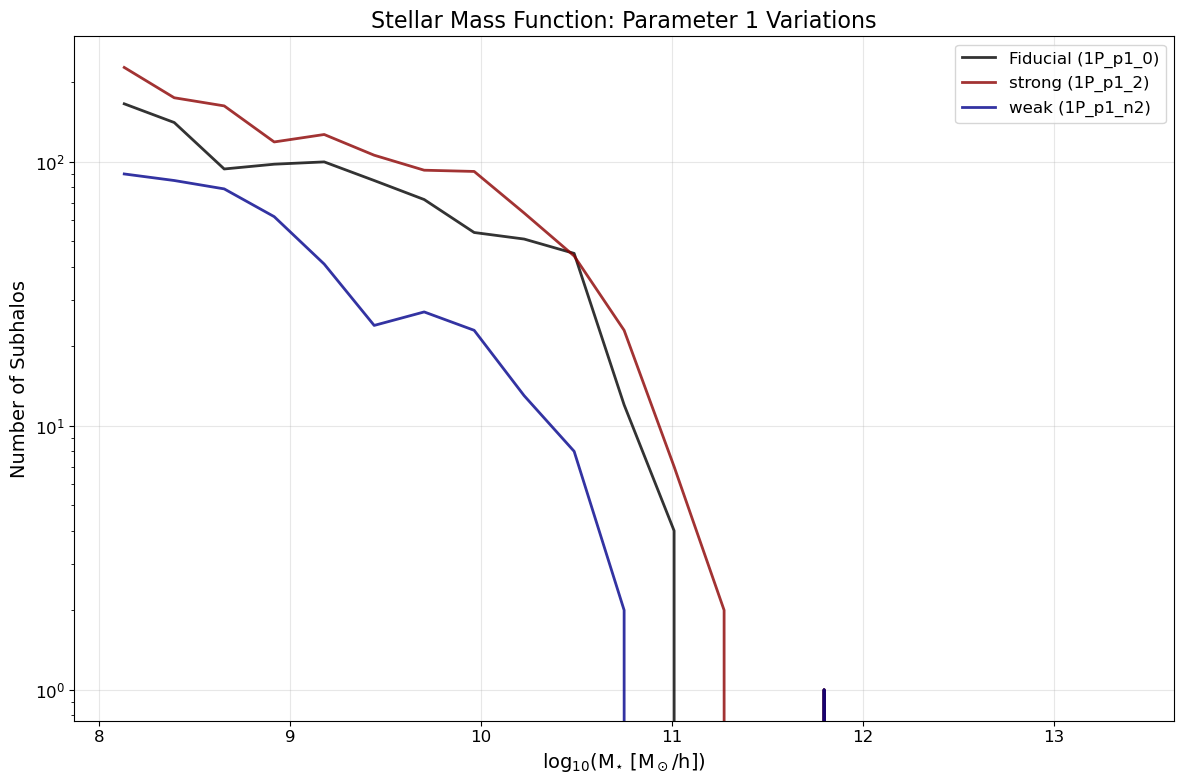

In [29]:
def load_stellar_mass_function(sim_path, snapshot_num=90):
    """
    Load the stellar mass function from a simulation.
    """
    groups_path = os.path.join(sim_path, f'groups_{snapshot_num:03d}.hdf5')
    
    if not os.path.exists(groups_path):
        return None
    
    with h5py.File(groups_path, 'r') as f:
        stellar_mass = f['Subhalo/SubhaloMassType'][:, 4] * 1e10  # Convert to Msun/h
    
    # Only include subhalos with stars
    stellar_mass = stellar_mass[stellar_mass > 0]
    
    return stellar_mass

# Example: Compare variations of parameter 7 (supernova feedback)
param_num = 1
variations = ['0', '2', 'n2']
colors = ['black', 'darkred', 'darkblue']
labels = ['Fiducial', 'strong', 'weak']

fig, ax = plt.subplots(figsize=(12, 8))

for var, color, label in zip(variations, colors, labels):
    sim_name = f'1P_p{param_num}_{var}'
    sim_full_path = os.path.join(param_path, sim_name)
    
    stellar_masses = load_stellar_mass_function(sim_full_path)
    
    if stellar_masses is not None:
        # Create histogram
        hist, bin_edges = np.histogram(np.log10(stellar_masses), bins=21, 
                                      range=(8, 13.5))
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        
        ax.plot(bin_centers, hist, label=f'{label} ({sim_name})', 
                color=color, linewidth=2, alpha=0.8)

ax.set_xlabel(r'log$_{10}$(M$_{\star}$ [M$_\odot$/h])', fontsize=14)
ax.set_ylabel('Number of Subhalos', fontsize=14)
ax.set_title(f'Stellar Mass Function: Parameter {param_num} Variations', fontsize=16)
ax.set_yscale('log')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Gas Physics: Preparing for Compton Y Parameter

The **Compton Y parameter** characterizes the thermal Sunyaev-Zel'dovich (tSZ) effect from hot gas. It's an important observable for galaxy clusters.

### Physical Background

The Compton Y parameter is defined as:

$$Y = \int \frac{k_B T_e}{m_e c^2} n_e \sigma_T dV$$

where:
- $k_B$ = Boltzmann constant
- $T_e$ = electron temperature
- $m_e c^2$ = electron rest mass energy
- $n_e$ = electron number density
- $\sigma_T$ = Thomson cross section

Let's load the gas properties we'll need for this calculation.

In [34]:
# Load gas properties for the massive halo region
gas_positions_halo = gas_positions[gas_mask]
gas_masses = load_particle_data(snapshot_file, 0, 'Masses')[gas_mask]  # 10^10 Msun/h
gas_density = load_particle_data(snapshot_file, 0, 'Density')[gas_mask]  # (10^10 Msun/h) / (ckpc/h)^3

# Load temperature if available
with h5py.File(snapshot_file, 'r') as f:
    if 'PartType0/Temperature' in f:
        gas_temperature = f['PartType0/Temperature'][:][gas_mask]  # Kelvin
        print("Temperature data available!")
    else:
        # Calculate from internal energy
        internal_energy = f['PartType0/InternalEnergy'][:][gas_mask]
        ne = f['PartType0/ElectronAbundance'][:][gas_mask]
        PROTONMASS = 1.6726219e-24  # g
        BOLTZMANN = 1.380649e-16    # erg/K
        yhelium = 0.0789
        gas_temperature = internal_energy * (1.0 + 4.0*yhelium) / (1.0 + yhelium + ne) * 1e10 * (2.0/3.0)
        gas_temperature *= (PROTONMASS / BOLTZMANN)
        print("Will need to calculate temperature from internal energy")

print(f"\nGas properties loaded for {len(gas_masses):,} gas particles")
print(f"Mass range: {gas_masses.min():.2e} - {gas_masses.max():.2e} x 10^10 Msun/h")
print(f"Density range: {gas_density.min():.2e} - {gas_density.max():.2e}")
if 'gas_temperature' in locals():
    print(f"Temperature range: {gas_temperature.min():.2e} - {gas_temperature.max():.2e} K")

Will need to calculate temperature from internal energy

Gas properties loaded for 1,043,416 gas particles
Mass range: 1.41e-04 - 3.97e-03 x 10^10 Msun/h
Density range: 1.74e-10 - 1.03e-01
Temperature range: 2.98e+01 - 4.69e+07 K


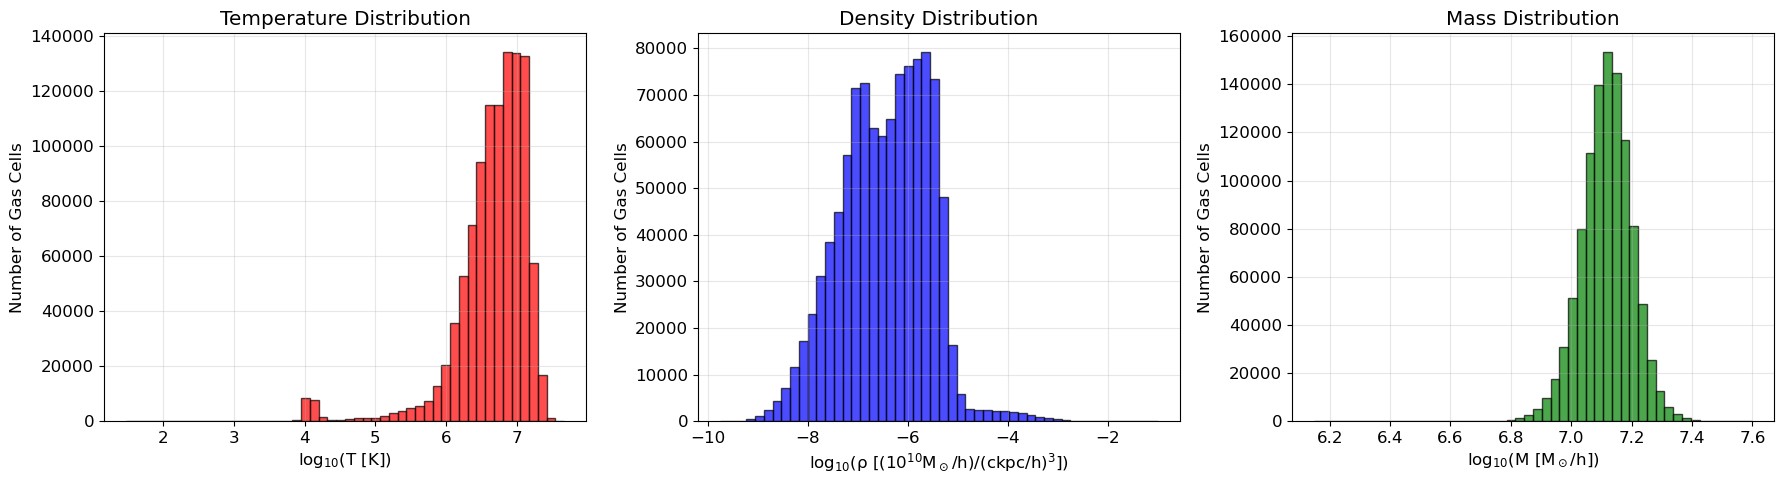

In [35]:
# Visualize gas properties
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature distribution
if 'gas_temperature' in locals():
    axes[0].hist(np.log10(gas_temperature), bins=50, color='red', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel(r'log$_{10}$(T [K])')
    axes[0].set_ylabel('Number of Gas Cells')
    axes[0].set_title('Temperature Distribution')
    axes[0].grid(True, alpha=0.3)

# Density distribution
axes[1].hist(np.log10(gas_density), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel(r'log$_{10}$(ρ [(10$^{10}$M$_\odot$/h)/(ckpc/h)$^3$])')
axes[1].set_ylabel('Number of Gas Cells')
axes[1].set_title('Density Distribution')
axes[1].grid(True, alpha=0.3)

# Mass distribution
axes[2].hist(np.log10(gas_masses * 1e10), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2].set_xlabel(r'log$_{10}$(M [M$_\odot$/h])')
axes[2].set_ylabel('Number of Gas Cells')
axes[2].set_title('Mass Distribution')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Final Exercise: Compute the Compton Y Parameter

**Your Task:** Calculate the Compton Y parameter for the most massive halo in the simulation.

### Steps to complete:

1. **Select gas particles** within R200 of the halo center
2. **Calculate electron number density** from gas density:
   - $n_e = \rho X_H f_{ion} / (\mu_e m_p)$
   - Where $X_H \approx 0.76$ (hydrogen fraction), $f_{ion} \approx 1$ (ionization fraction)
   - $\mu_e \approx 1.14$ (mean molecular weight per electron)
   - $m_p$ = proton mass

3. **Calculate Y for each gas cell**:
   - $Y_i = \frac{k_B T_{e,i}}{m_e c^2} n_{e,i} \sigma_T V_i$
   - Where $V_i = M_i / \rho_i$ is the cell volume

4. **Sum over all cells** within R200: $Y_{total} = \sum_i Y_i$

### Physical Constants (in cgs units):
```python
k_B = 1.380649e-16  # erg/K
m_e = 9.1093837e-28  # g
c = 2.99792458e10  # cm/s
sigma_T = 6.6524587e-25  # cm^2
m_p = 1.6726219e-24  # g
Msun = 1.989e33  # g
kpc = 3.086e21  # cm
```

### Hints:
- Convert simulation units to cgs before calculating
- Densities are in $(10^{10} M_\odot/h) / (ckpc/h)^3$
- Masses are in $10^{10} M_\odot/h$
- Remember to account for the Hubble parameter $h \approx 0.7$

In [ ]:
# Physical constants in cgs
k_B = 1.380649e-16  # erg/K
m_e = 9.1093837e-28  # g
c = 2.99792458e10  # cm/s
sigma_T = 6.6524587e-25  # cm^2
m_p = 1.6726219e-24  # g
Msun = 1.989e33  # g
kpc = 3.086e21  # cm

# Simulation-specific parameters
h = 0.6774  # Hubble parameter (check header for exact value)
X_H = 0.76  # Hydrogen mass fraction
mu_e = 1.14  # Mean molecular weight per electron

# YOUR CODE HERE
# Step 1: Select gas within R200
# Calculate distance from halo center
# dx = ...
# r = ...
# r200_mask = ...

# Step 2: Get gas properties within R200
# gas_T_r200 = ...
# gas_rho_r200 = ...
# gas_M_r200 = ...

# Step 3: Convert to cgs units
# Density: (10^10 Msun/h) / (ckpc/h)^3 -> g/cm^3
# rho_cgs = ...

# Mass: 10^10 Msun/h -> g
# M_cgs = ...

# Step 4: Calculate electron number density
# n_e = ...

# Step 5: Calculate volume of each cell
# V = M / rho
# V_cell = ...

# Step 6: Calculate Y for each cell
# Y_cell = (k_B * T) / (m_e * c^2) * n_e * sigma_T * V
# Y_cells = ...

# Step 7: Sum to get total Y
# Y_total = ...

# print(f"Total Compton Y parameter: {Y_total:.3e} cm^2")
# print(f"Mean gas temperature within R200: {gas_T_r200.mean():.2e} K")
# print(f"Total gas mass within R200: {gas_M_r200.sum():.2e} x 10^10 Msun/h")

### Extension: Compare Y parameter across parameter variations

As an additional exercise, you could:
1. Calculate Y for the same halo in different parameter variation simulations
2. See how feedback parameters affect the Y parameter
3. Plot Y vs. stellar mass or halo mass to find scaling relations

In [ ]:
# Extension exercise: Your code here
# Compare Y parameter across different simulations

## Summary

In this tutorial, you've learned:

1. ✅ What cosmological simulations are and why they're important
2. ✅ How to access and read HDF5 simulation data
3. ✅ About different particle types (gas, dark matter, stars, black holes)
4. ✅ How to visualize particle distributions
5. ✅ What halos and subhalos represent
6. ✅ How parameter variations affect simulation outcomes
7. ✅ How to compute physical observables (Compton Y parameter) from simulation data

### Next Steps

- Explore different snapshots to see time evolution
- Analyze radial profiles of halos
- Study galaxy properties and scaling relations
- Compare different simulation suites (LH vs 1P)
- Implement your own analysis pipelines!

### Resources

- [IllustrisTNG Website](https://www.tng-project.org/)
- [HDF5 Documentation](https://www.hdfgroup.org/solutions/hdf5/)
- [Python h5py Tutorial](https://docs.h5py.org/en/stable/quick.html)